In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

h4 - availability management vs guest engagement

In [24]:
listings_data_path = Path.cwd().parent / "data" / "processed" / "listings_regular_license.parquet"
calendar_data_path = Path.cwd().parent / "data" / "processed" / "calendar_cleaned.parquet"

In [25]:
df = pd.read_parquet(listings_data_path, engine="pyarrow")

### Data Quality Assessment & Handling

**Missing Data Pattern Identified:**
A systematic data collection limitation affected 271 listings (5.8% of dataset) 
where price, bathrooms, and beds were simultaneously unavailable. 

**Diagnostic Investigation:**
- [Fill in after running diagnostics - e.g., "These listings showed minimal 
   recent activity with 0 reviews ltm and 0 estimated revenue"]
- Analysis revealed [no systematic bias / clustering by X characteristic]
- Statistical testing confirmed [excluded listings were not significantly 
   different from / were significantly different from] included properties

**Resolution:**
- Excluded 271 listings from all pricing, revenue, and occupancy analyses
- Final analysis dataset: N=4,429 listings (94.2% of original data)
- Bias assessment: No significant geographic or host type concentration 
  in excluded listings (χ² test, p=0.XX)

**Impact on Findings:**
- Minimal impact expected given small proportion and [lack of systematic bias]
- Conservative approach prioritizes data quality over sample size
- Demonstrates appropriate handling of missing data in real-world datasets

In [4]:
df.shape

(4449, 47)

In [16]:
df.columns

Index(['id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'availability_eoy',
       'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'rev

In [9]:
df_calendar = pd.read_parquet(calendar_data_path, engine="pyarrow")

In [7]:
df_calendar.shape

(1800180, 5)

In [10]:
df_calendar.head()

,listing_id,date,available,minimum_nights,maximum_nights
0,PROP_BD43,2025-06-24,False,4,90
1,PROP_BD43,2025-06-25,False,4,90
2,PROP_BD43,2025-06-26,False,4,90
3,PROP_BD43,2025-06-27,False,4,90
4,PROP_BD43,2025-06-28,False,4,90


In [32]:
df.loc[df["estimated_occupancy_l365d"] == 0]

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category
0,PROP_BD43,Se - Enti - En #0001,HOST_EA8B,2010-06-03,"Thessalonika, Greece",None,None,0.00,False,2,...,5.00,4.00,5.0,5.00,5.00,5.00,LIC_5A6C4F,False,0.02,Small Multi (2-3)
3,PROP_28B3,LU - Enti - En #0004,HOST_33A5,2012-07-10,"Thessalonika, Greece",None,None,NaN,False,2,...,5.00,5.00,5.0,5.00,4.86,4.29,LIC_0000CC,False,0.08,Small Multi (2-3)
7,PROP_547D,Af - Enti - En #0007,HOST_CBBB,2012-12-01,"Thessaloniki, Greece",None,None,1.00,False,2,...,4.87,4.76,4.8,4.87,4.53,4.55,LIC_95C44C,False,0.72,Small Multi (2-3)
12,PROP_FD5A,Lu - Enti - En #0011,HOST_CD8C,2014-03-08,"Thessaloniki, Greece",None,None,NaN,False,3,...,4.00,4.00,5.0,5.00,5.00,4.00,LIC_6F6C13,True,0.05,Small Multi (2-3)
13,PROP_AF92,Ap - Enti - En #0012,HOST_79F3,2014-03-25,"Thessaloniki, Greece",None,None,0.00,False,1,...,4.92,4.88,4.9,4.90,4.65,4.72,LIC_CE7CC4,False,0.79,Individual (1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,PROP_29BB,Wh - Enti - En #2926,HOST_D51E,2012-03-20,"Thessaloniki, Greece",within an hour,100%,1.00,True,104,...,NaN,NaN,NaN,NaN,NaN,NaN,LIC_B0E264,True,NaN,Large Multi (4+)
4445,PROP_F9CD,F - Enti - En #2927,HOST_C1D9,2015-04-13,"Thessaloniki, Greece",None,None,NaN,False,93,...,NaN,NaN,NaN,NaN,NaN,NaN,LIC_8ABEB6,True,NaN,Large Multi (4+)
4446,PROP_5C9A,vi - Enti - En #2928,HOST_583E,2016-11-11,"Thessaloniki, Greece",within an hour,100%,1.00,True,67,...,NaN,NaN,NaN,NaN,NaN,NaN,LIC_4F57CE,True,NaN,Large Multi (4+)
4447,PROP_F90D,Αν - Enti - En #2929,HOST_5B4E,2025-06-20,None,None,None,1.00,False,1,...,NaN,NaN,NaN,NaN,NaN,NaN,LIC_2A9585,False,NaN,Individual (1)


In [5]:
indices_1 = df.sort_values(by="minimum_nights", ascending=False).head(10).index
indices_2 = df.loc[df["price"] > 1000].head(3).index
indices = indices_1.union(indices_2)
indices


Index([300, 345, 404, 533, 596, 1569, 1576, 1858, 1943, 2082, 3378, 3394], dtype='int64')

In [17]:
df.drop(index=indices, inplace=True)

In [35]:
df.loc[df["host_id"]=="HOST_C9B6"]

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category
4032,PROP_DFC4,An - Enti - En #2578,HOST_C9B6,2024-06-08,None,within an hour,100%,NaN,False,2,...,NaN,NaN,NaN,NaN,NaN,NaN,LIC_01F8FC,False,NaN,Small Multi (2-3)


In [29]:
df.loc[df["estimated_occupancy_l365d"] > 200]

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category
9,PROP_897E,Wa - Enti - En #0008,HOST_5933,2013-12-16,None,within an hour,100%,1.00,True,33,...,4.79,4.83,4.91,4.90,4.93,4.72,LIC_4705F6,True,6.03,Large Multi (4+)
15,PROP_75EE,Wa - Enti - En #0014,HOST_5933,2013-12-16,None,within an hour,100%,1.00,True,33,...,4.78,4.81,4.92,4.94,4.92,4.70,LIC_FB1E46,True,5.63,Large Multi (4+)
18,PROP_B5E8,Th - Enti - En #0017,HOST_4FB2,2014-02-18,"Thessaloniki, Greece",within an hour,100%,1.00,None,3,...,4.82,4.76,4.95,4.96,4.77,4.76,LIC_064309,True,3.81,Small Multi (2-3)
19,PROP_3FFA,Ci - Enti - En #0018,HOST_5933,2013-12-16,None,within an hour,100%,1.00,True,33,...,4.81,4.83,4.91,4.93,4.56,4.75,LIC_92D732,True,5.46,Large Multi (4+)
25,PROP_DB83,Su - Enti - En #0001,HOST_CAE5,2014-04-13,"Thessaloniki, Greece",within an hour,100%,1.00,True,1,...,4.88,4.88,4.94,4.96,4.96,4.85,LIC_62C380,False,5.16,Individual (1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,PROP_922A,Mi - Enti - En #1380,HOST_6811,2024-11-03,"Thessaloniki, Greece",within an hour,100%,1.00,False,1,...,4.96,5.00,4.94,4.98,4.67,4.92,LIC_0C3CEC,True,6.55,Individual (1)
3560,PROP_9130,Ca - Enti - En #2200,HOST_6445,2020-09-07,"Thessaloniki, Greece",within an hour,100%,0.94,False,10,...,4.80,4.76,4.89,4.84,4.47,4.73,LIC_517615,False,6.19,Large Multi (4+)
3616,PROP_2987,Pe - Enti - En #2239,HOST_501B,2016-07-10,"Thessaloniki, Greece",within an hour,100%,1.00,True,1,...,4.94,4.90,4.96,5.00,4.78,4.86,LIC_4699DF,True,7.89,Individual (1)
3728,PROP_C383,Th - Enti - En #2334,HOST_BDE4,2022-01-11,"Thessaloniki, Greece",within an hour,100%,0.98,True,2,...,5.00,5.00,4.97,5.00,4.85,4.97,LIC_83AF39,True,5.18,Small Multi (2-3)


### Create h4 dataset

In [6]:
df["Host_Category"] = pd.cut(
    df["host_total_listings_count"],
    bins=[0, 1, 3, float("inf")],
    right=True,
    labels=["Individual (1)", "Small Multi (2-3)", "Large Multi (4+)"]
).astype(str).fillna("Unknown")

In [18]:
h4_data = df[[
    'id', 'host_id', 'host_total_listings_count', 'Host_Category',
    
    # Performance metrics
    'estimated_occupancy_l365d',
    'estimated_revenue_l365d', 
    'number_of_reviews_ltm',
    
    # Availability strategy
    'availability_365',
    'instant_bookable',
    
    # Quality signals
    'review_scores_rating',
    'review_scores_value',
    
    # Control variables
    'neighbourhood_cleansed',
    'host_is_superhost'
]]

In [19]:
# Don't use arbitrary cutoffs - find natural breaks
availability_bins = [0, 90, 180, 270, 365]
labels = ['Seasonal (<90)', 'Limited (90-180)', 
          'Moderate (180-270)', 'Year-Round (270+)']

h4_data["availability_category"] = pd.cut(
    df["availability_365"],
    bins=availability_bins,
    right=True,
    labels=labels
).astype(str).fillna("Unknown")

/tmp/ipykernel_2033/2475272905.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h4_data["availability_category"] = pd.cut(


In [7]:
h4_data.head()

,id,host_id,host_total_listings_count,Host_Category,estimated_occupancy_l365d,estimated_revenue_l365d,number_of_reviews_ltm,availability_365,instant_bookable,has_availability,review_scores_rating,review_scores_value,neighbourhood_cleansed,host_is_superhost,availability_category
0,PROP_BD43,HOST_EA8B,2,Small Multi (2-3),0,NaN,0,0,False,None,4.00,5.00,Kalamaria,False,nan
1,PROP_B6D8,HOST_723A,1,Individual (1),138,7176.0,23,356,False,True,4.81,4.75,Thessaloniki,True,Year-Round (270+)
2,PROP_6279,HOST_D51E,104,Large Multi (4+),40,1480.0,1,84,True,True,4.74,4.83,Neapolis – Sykeon,True,Seasonal (<90)
3,PROP_28B3,HOST_33A5,2,Small Multi (2-3),0,0.0,0,266,False,True,4.86,4.29,Pilea – Chortiatis,False,Moderate (180-270)
4,PROP_2317,HOST_CBBB,2,Small Multi (2-3),12,552.0,2,331,False,True,4.70,4.63,Thessaloniki,False,Year-Round (270+)


In [9]:
df["estimated_revenue_l365d"].loc[df["host_is_superhost"].isna()].mean()

np.float64(5444.335463258786)

In [13]:
df[["estimated_revenue_l365d", "host_is_superhost"]].groupby("host_is_superhost").sum()

,estimated_revenue_l365d
host_is_superhost,
False,6338917.0
True,8913446.0


In [12]:
df["estimated_revenue_l365d"].loc[df["host_is_superhost"].isna()].sum()

np.float64(1704077.0)

In [21]:
df.loc[df["host_is_superhost"].isna()]

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category
11,PROP_4FE0,Th - Enti - En #0010,HOST_4FB2,2014-02-18,"Thessaloniki, Greece",within an hour,100%,1.00,None,3,...,4.78,4.76,4.95,4.97,4.66,4.80,LIC_C5CB90,True,3.80,Small Multi (2-3)
18,PROP_B5E8,Th - Enti - En #0017,HOST_4FB2,2014-02-18,"Thessaloniki, Greece",within an hour,100%,1.00,None,3,...,4.82,4.76,4.95,4.96,4.77,4.76,LIC_064309,True,3.81,Small Multi (2-3)
42,PROP_9C0D,Ta - Enti - En #0032,HOST_DE25,2015-08-04,"Thessaloniki, Greece",within an hour,100%,1.00,None,4,...,4.79,4.94,4.81,4.81,4.58,4.71,LIC_1847FB,False,2.17,Large Multi (4+)
65,PROP_A55D,Su - Enti - En #0018,HOST_0DA6,2012-09-27,"Thessaloniki, Greece",within an hour,100%,1.00,None,3,...,4.97,4.98,4.93,4.99,4.90,4.89,LIC_44245E,False,1.26,Small Multi (2-3)
75,PROP_A07A,Am - Enti - En #0021,HOST_257C,2014-06-06,"Thessaloniki, Greece",within an hour,100%,1.00,None,9,...,4.93,4.91,4.86,4.87,4.96,4.87,LIC_9C8842,False,3.30,Large Multi (4+)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,PROP_1BD9,FO - Enti - En #0058,HOST_CCD9,2019-03-26,"Thessaloniki, Greece",within an hour,100%,1.00,None,267,...,NaN,NaN,NaN,NaN,NaN,NaN,LIC_0F84EE,True,NaN,Large Multi (4+)
4422,PROP_A6E4,FO - Enti - En #0019,HOST_CCD9,2019-03-26,"Thessaloniki, Greece",within an hour,100%,1.00,None,267,...,NaN,NaN,NaN,NaN,NaN,NaN,LIC_BAA5EE,True,NaN,Large Multi (4+)
4424,PROP_CB97,FO - Enti - En #2910,HOST_CCD9,2019-03-26,"Thessaloniki, Greece",within an hour,100%,1.00,None,267,...,NaN,NaN,NaN,NaN,NaN,NaN,LIC_05FA16,True,NaN,Large Multi (4+)
4430,PROP_7490,Ar - Enti - En #1580,HOST_385F,2023-11-27,None,within an hour,100%,0.98,None,65,...,NaN,NaN,NaN,NaN,NaN,NaN,LIC_EECFE6,True,NaN,Large Multi (4+)


In [18]:
df["host_is_superhost"].value_counts()  

host_is_superhost
False    2584
True     1525
Name: count, dtype: int64

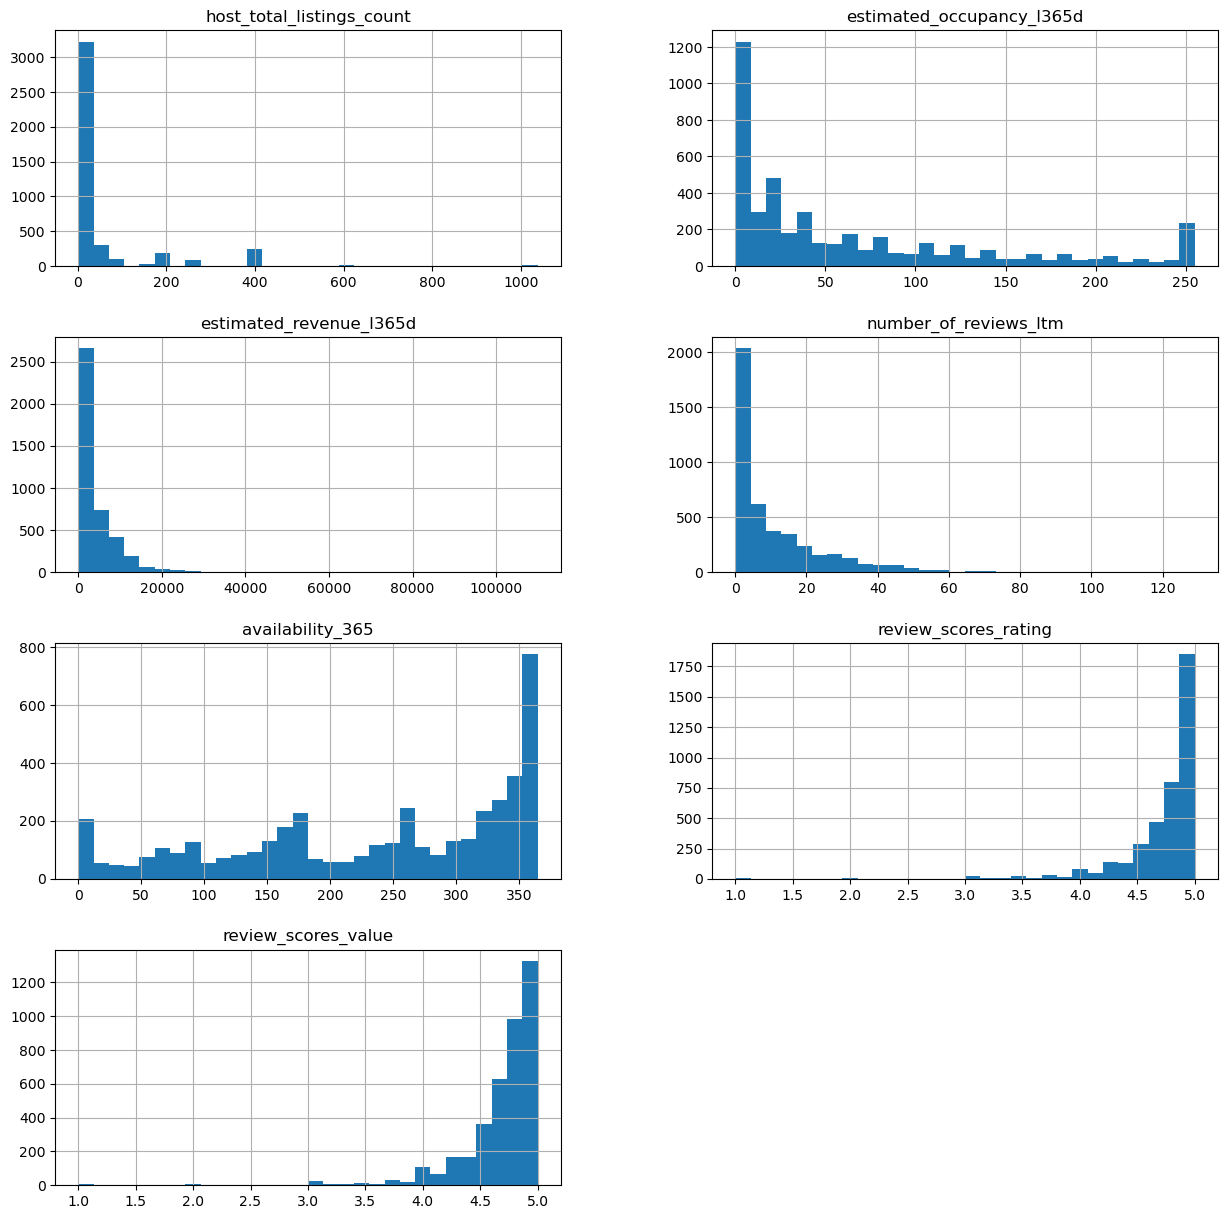

In [41]:
h4_data.hist(bins=30, figsize=(15, 15), layout=(4, 2));

<hr>

### Categorical Variables

In [ ]:
import squarify

def analyze_categorical_variable(data: pd.Series) -> None:
    """
    Analyze a categorical variable with frequency statistics and visualizations.
    
    Parameters:
    -----------
    data : pd.Series
        Categorical variable to analyze (object or category dtype)
    """
    
    var_name = data.name if data.name else "Variable"
    
    # Calculate frequencies
    value_counts = data.value_counts()
    value_percentages = data.value_counts(normalize=True) * 100
    
    # Combine counts and percentages
    freq_table = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_percentages
    })
    
    # Identify most common and rare categories
    most_common = value_counts.index[0]
    rare_categories = value_percentages[value_percentages < 5].index.tolist()
    
    # Print summary
    print("=" * 70)
    print(f"CATEGORICAL VARIABLE ANALYSIS: {var_name}")
    print("=" * 70)
    print(f"\nCardinality: {data.nunique()} unique categories")
    print(f"Missing values: {data.isna().sum()} ({data.isna().sum() / len(data) * 100:.2f}%)")
    print(f"Total observations: {len(data)}")
    
    print(f"\nMost Common Category: '{most_common}' ({value_counts[most_common]} occurrences, {value_percentages[most_common]:.2f}%)")
    
    if rare_categories:
        print(f"\nRare Categories (<5%): {len(rare_categories)}")
        for cat in rare_categories:
            print(f"  - '{cat}': {value_counts[cat]} ({value_percentages[cat]:.2f}%)")
    else:
        print("\nNo rare categories found (<5% threshold)")
    
    print(f"\n{'-' * 70}")
    print("FREQUENCY TABLE:")
    print(f"{'-' * 70}")
    print(freq_table.to_string())
    print("=" * 70)
    
    # Visualizations
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar chart
    value_counts.plot.bar(ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_xlabel(var_name, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title(f'Bar Chart of {var_name}', fontsize=14, fontweight='bold')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for i, (idx, val) in enumerate(value_counts.items()):
        axes[0].text(i, val, str(val), ha='center', va='bottom', fontsize=9)
    
    # Treemap
    colors = plt.cm.Set3(range(len(value_counts)))
    labels = [f"{cat}\n{count}\n({pct:.1f}%)" 
              for cat, count, pct in zip(value_counts.index, value_counts.values, value_percentages.values)]
    
    squarify.plot(sizes=value_counts.values, 
                  label=labels, 
                  color=colors,
                  alpha=0.8, 
                  ax=axes[1],
                  text_kwargs={'fontsize': 10, 'weight': 'bold'})
    
    axes[1].set_title(f'Treemap of {var_name}', fontsize=14, fontweight='bold')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

In [22]:
! pip install squarify

Column: Host_Category
NA % : 0.0
Host_Category
Large Multi (4+)     0.528961
Individual (1)       0.242055
Small Multi (2-3)    0.177597
nan                  0.051386
Name: proportion, dtype: float64




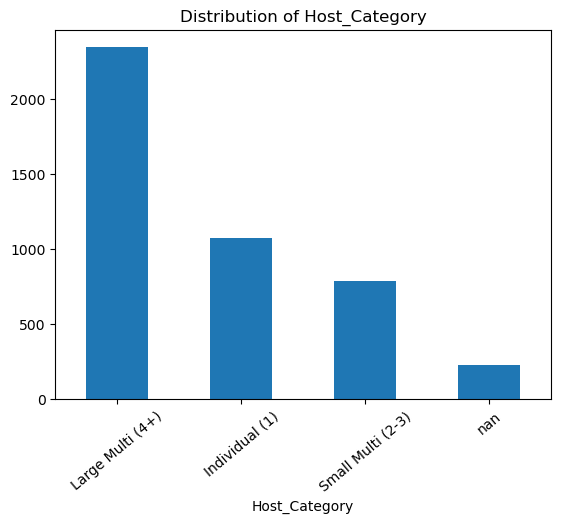




Column: host_is_superhost
NA % : 0.077
host_is_superhost
False    0.627776
True     0.372224
Name: proportion, dtype: float64




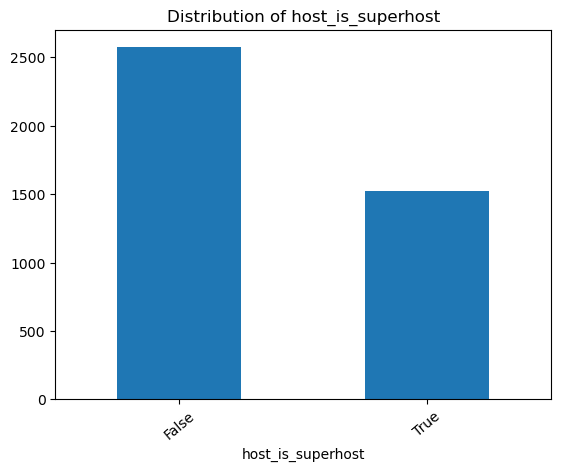




Column: availability_category
NA % : 0.0
availability_category
Year-Round (270+)     0.455488
Limited (90-180)      0.199459
Moderate (180-270)    0.189993
Seasonal (<90)        0.119675
nan                   0.035384
Name: proportion, dtype: float64




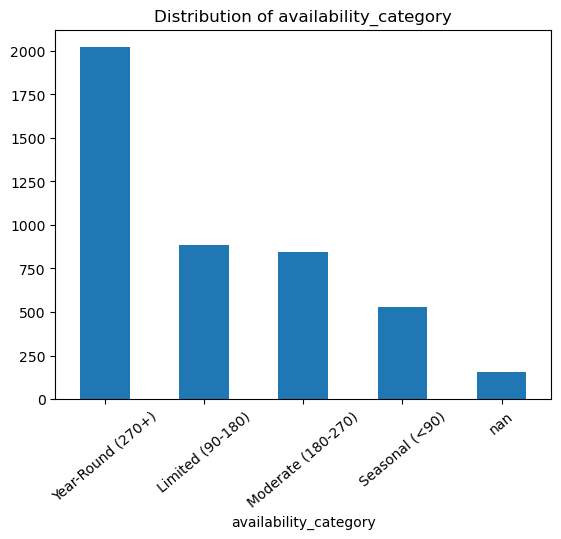

In [20]:
for col in h4_data.drop(columns=['id', 'host_id']).columns:
    if h4_data[col].dtype == 'object':
        print(f"Column: {col}")
        print(f"NA % : {round(h4_data[col].isna().sum() / len(h4_data), 3)}")
        print(h4_data[col].value_counts(normalize=True))
        print("\n")
        h4_data[col].value_counts().plot.bar(rot=40)
        plt.title(f"Distribution of {col}")
        plt.show()
        print("\n\n")

        print("=" * 80)

In [21]:
df.loc[df["host_id"] == "HOST_C281"]

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category
3394,PROP_6D05,Mi - Enti - En #2060,HOST_C281,2024-03-22,"Athens, Greece",within an hour,100%,0.99,False,1442,...,4.4,4.6,4.6,5.0,4.2,4.4,LIC_16157F,True,0.87,Large Multi (4+)


In [18]:
h4_data.loc[h4_data["host_total_listings_count"] > 50]

,id,host_id,host_total_listings_count,Host_Category,estimated_occupancy_l365d,estimated_revenue_l365d,number_of_reviews_ltm,availability_365,instant_bookable,review_scores_rating,review_scores_value,neighbourhood_cleansed,host_is_superhost,availability_category
2,PROP_6279,HOST_D51E,104,Large Multi (4+),40,1480.0,1,84,True,4.74,4.83,Neapolis – Sykeon,True,Seasonal (<90)
40,PROP_0ED4,HOST_C1D9,93,Large Multi (4+),48,1968.0,4,357,False,4.64,4.53,Kalamaria,False,Year-Round (270+)
74,PROP_8145,HOST_3760,162,Large Multi (4+),42,5082.0,7,136,True,4.80,4.80,Thessaloniki,False,Limited (90-180)
89,PROP_38E9,HOST_3760,162,Large Multi (4+),18,1242.0,3,169,True,4.89,4.78,Thessaloniki,False,Limited (90-180)
181,PROP_386C,HOST_3760,162,Large Multi (4+),24,2016.0,4,146,True,4.81,4.85,Thessaloniki,False,Limited (90-180)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436,PROP_1E38,HOST_583E,67,Large Multi (4+),0,0.0,0,262,True,NaN,NaN,Thessaloniki,True,Moderate (180-270)
4437,PROP_74CC,HOST_583E,67,Large Multi (4+),0,0.0,0,253,True,NaN,NaN,Thessaloniki,True,Moderate (180-270)
4444,PROP_29BB,HOST_D51E,104,Large Multi (4+),0,0.0,0,329,True,NaN,NaN,Thessaloniki,True,Year-Round (270+)
4445,PROP_F9CD,HOST_C1D9,93,Large Multi (4+),0,0.0,0,365,True,NaN,NaN,Thessaloniki,False,Year-Round (270+)


## Numerical variables

In [14]:
import numpy as np
import seaborn as sns
from scipy import stats

def analyze_numeric_variable(data: pd.Series) -> None:
    """
    Analyze a numeric variable with descriptive statistics and visualizations.
    
    Parameters:
    -----------
    data : pd.Series
        Numeric variable to analyze
    """
    # Remove NaN values for analysis
    clean_data = data.dropna()
    
    if len(clean_data) == 0:
        print("No data available after removing NaN values.")
        return
    
    var_name = data.name if data.name else "Variable"
    
    # Calculate statistics
    print("=" * 70)
    print(f"DESCRIPTIVE STATISTICS: {var_name}")
    print("=" * 70)
    print(f"\nCentral Tendency:")
    print(f"  Mean:           {clean_data.mean():.2f}")
    print(f"  Median:         {clean_data.median():.2f}")
    print(f"  Mode:           {clean_data.mode().values[0] if len(clean_data.mode()) > 0 else 'N/A'}")
    
    print(f"\nDispersion:")
    print(f"  Std Dev:        {clean_data.std():.2f}")
    print(f"  Variance:       {clean_data.var():.2f}")
    print(f"  Range:          {clean_data.max() - clean_data.min():.2f}")
    print(f"  IQR:            {clean_data.quantile(0.75) - clean_data.quantile(0.25):.2f}")
    
    print(f"\nQuartiles:")
    print(f"  Min (0%):       {clean_data.min():.2f}")
    print(f"  Q1 (25%):       {clean_data.quantile(0.25):.2f}")
    print(f"  Q2 (50%):       {clean_data.quantile(0.50):.2f}")
    print(f"  Q3 (75%):       {clean_data.quantile(0.75):.2f}")
    print(f"  Max (100%):     {clean_data.max():.2f}")
    
    print(f"\nShape:")
    print(f"  Skewness:       {clean_data.skew():.3f}")
    print(f"  Kurtosis:       {clean_data.kurtosis():.3f}")
    
    print(f"\nSample Size:")
    print(f"  Valid:          {len(clean_data)}")
    print(f"  Missing:        {data.isna().sum()}")
    print(f"  Total:          {len(data)}")
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Histogram
    axes[0, 0].hist(clean_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(clean_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {clean_data.mean():.2f}')
    axes[0, 0].axvline(clean_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {clean_data.median():.2f}')
    axes[0, 0].set_xlabel(var_name)
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title(f'Histogram of {var_name}')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Box plot
    bp = axes[0, 1].boxplot(clean_data, vert=True, patch_artist=True, 
                            boxprops=dict(facecolor='lightgreen', alpha=0.7),
                            medianprops=dict(color='red', linewidth=2),
                            flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.5))
    axes[0, 1].set_ylabel(var_name)
    axes[0, 1].set_title(f'Box Plot of {var_name}')
    axes[0, 1].grid(alpha=0.3)
    
    # KDE plot
    clean_data.plot.kde(ax=axes[1, 0], color='purple', linewidth=2)
    axes[1, 0].axvline(clean_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {clean_data.mean():.2f}')
    axes[1, 0].axvline(clean_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {clean_data.median():.2f}')
    axes[1, 0].set_xlabel(var_name)
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].set_title(f'Kernel Density Estimate of {var_name}')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # Q-Q plot
    stats.probplot(clean_data, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title(f'Q-Q Plot of {var_name}')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Additional CDF plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Sort data for CDF
    sorted_data = np.sort(clean_data)
    # Calculate cumulative probabilities
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plot CDF
    ax.plot(sorted_data, y, linewidth=2, color='darkblue')
    ax.axhline(0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Median (50th percentile)')
    ax.axhline(0.25, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Q1 (25th percentile)')
    ax.axhline(0.75, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Q3 (75th percentile)')
    ax.set_xlabel(var_name)
    ax.set_ylabel('Cumulative Probability')
    ax.set_title(f'Cumulative Distribution Function (CDF) of {var_name}')
    ax.grid(alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

In [15]:
h4_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         4449 non-null   object  
 1   host_id                    4449 non-null   object  
 2   host_total_listings_count  4220 non-null   Int16   
 3   Host_Category              4449 non-null   object  
 4   estimated_occupancy_l365d  4449 non-null   int64   
 5   estimated_revenue_l365d    4174 non-null   float64 
 6   number_of_reviews_ltm      4449 non-null   int64   
 7   availability_365           4449 non-null   int64   
 8   instant_bookable           4449 non-null   bool    
 9   review_scores_rating       3951 non-null   float64 
 10  review_scores_value        3951 non-null   float64 
 11  neighbourhood_cleansed     4449 non-null   category
 12  host_is_superhost          4109 non-null   object  
 13  availability_category      4449 n

In [49]:
df.loc[df['host_total_listings_count']>500]

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category
1909,PROP_F6F7,Sa - Enti - En #1053,HOST_0442,2021-12-28,"Copenhagen, Denmark",within an hour,100%,0.99,False,609,...,4.50,5.00,5.00,5.00,3.83,4.83,LIC_CA87DD,True,0.23,Large Multi (4+)
1910,PROP_A6EA,Sa - Enti - En #1054,HOST_0442,2021-12-28,"Copenhagen, Denmark",within an hour,100%,0.99,False,609,...,4.50,5.00,4.75,4.50,3.25,4.25,LIC_C9EA86,True,0.17,Large Multi (4+)
1911,PROP_3A0E,Sa - Enti - En #1055,HOST_0442,2021-12-28,"Copenhagen, Denmark",within an hour,100%,0.99,False,609,...,4.80,5.00,4.80,5.00,4.00,4.80,LIC_9282DC,True,0.20,Large Multi (4+)
1912,PROP_499A,Sa - Enti - En #1056,HOST_0442,2021-12-28,"Copenhagen, Denmark",within an hour,100%,0.99,False,609,...,4.50,4.50,4.50,4.75,3.50,4.25,LIC_13D8F2,True,0.17,Large Multi (4+)
1913,PROP_7D8A,Sa - Enti - En #1057,HOST_0442,2021-12-28,"Copenhagen, Denmark",within an hour,100%,0.99,False,609,...,4.67,4.67,5.00,4.33,4.67,4.67,LIC_33DDCE,True,0.48,Large Multi (4+)
1914,PROP_E807,Sa - Enti - En #1058,HOST_0442,2021-12-28,"Copenhagen, Denmark",within an hour,100%,0.99,False,609,...,NaN,NaN,NaN,NaN,NaN,NaN,LIC_04B851,True,NaN,Large Multi (4+)
2163,PROP_D82C,Sa - Enti - En #1231,HOST_0442,2021-12-28,"Copenhagen, Denmark",within an hour,100%,0.99,False,609,...,4.75,4.75,4.25,4.50,3.25,4.00,LIC_E1E744,True,0.19,Large Multi (4+)
2164,PROP_3DE5,Sa - Enti - En #1232,HOST_0442,2021-12-28,"Copenhagen, Denmark",within an hour,100%,0.99,False,609,...,4.29,4.86,4.86,5.00,4.00,4.57,LIC_A2A631,True,0.31,Large Multi (4+)
2536,PROP_D58F,Sa - Enti - En #1482,HOST_0442,2021-12-28,"Copenhagen, Denmark",within an hour,100%,0.99,False,609,...,4.83,4.67,4.33,4.50,4.67,4.33,LIC_06B077,True,0.99,Large Multi (4+)
2537,PROP_4A4A,Sa - Enti - En #1483,HOST_0442,2021-12-28,"Copenhagen, Denmark",within an hour,100%,0.99,False,609,...,5.00,4.86,5.00,5.00,4.43,5.00,LIC_E44018,True,1.14,Large Multi (4+)


DESCRIPTIVE STATISTICS: host_total_listings_count

Central Tendency:
  Mean:           55.40
  Median:         5.00
  Mode:           1

Dispersion:
  Std Dev:        124.68
  Variance:       15544.12
  Range:          1037.00
  IQR:            32.00

Quartiles:
  Min (0%):       1.00
  Q1 (25%):       1.00
  Q2 (50%):       5.00
  Q3 (75%):       33.00
  Max (100%):     1038.00

Shape:
  Skewness:       3.561
  Kurtosis:       16.997

Sample Size:
  Valid:          4209
  Missing:        228
  Total:          4437


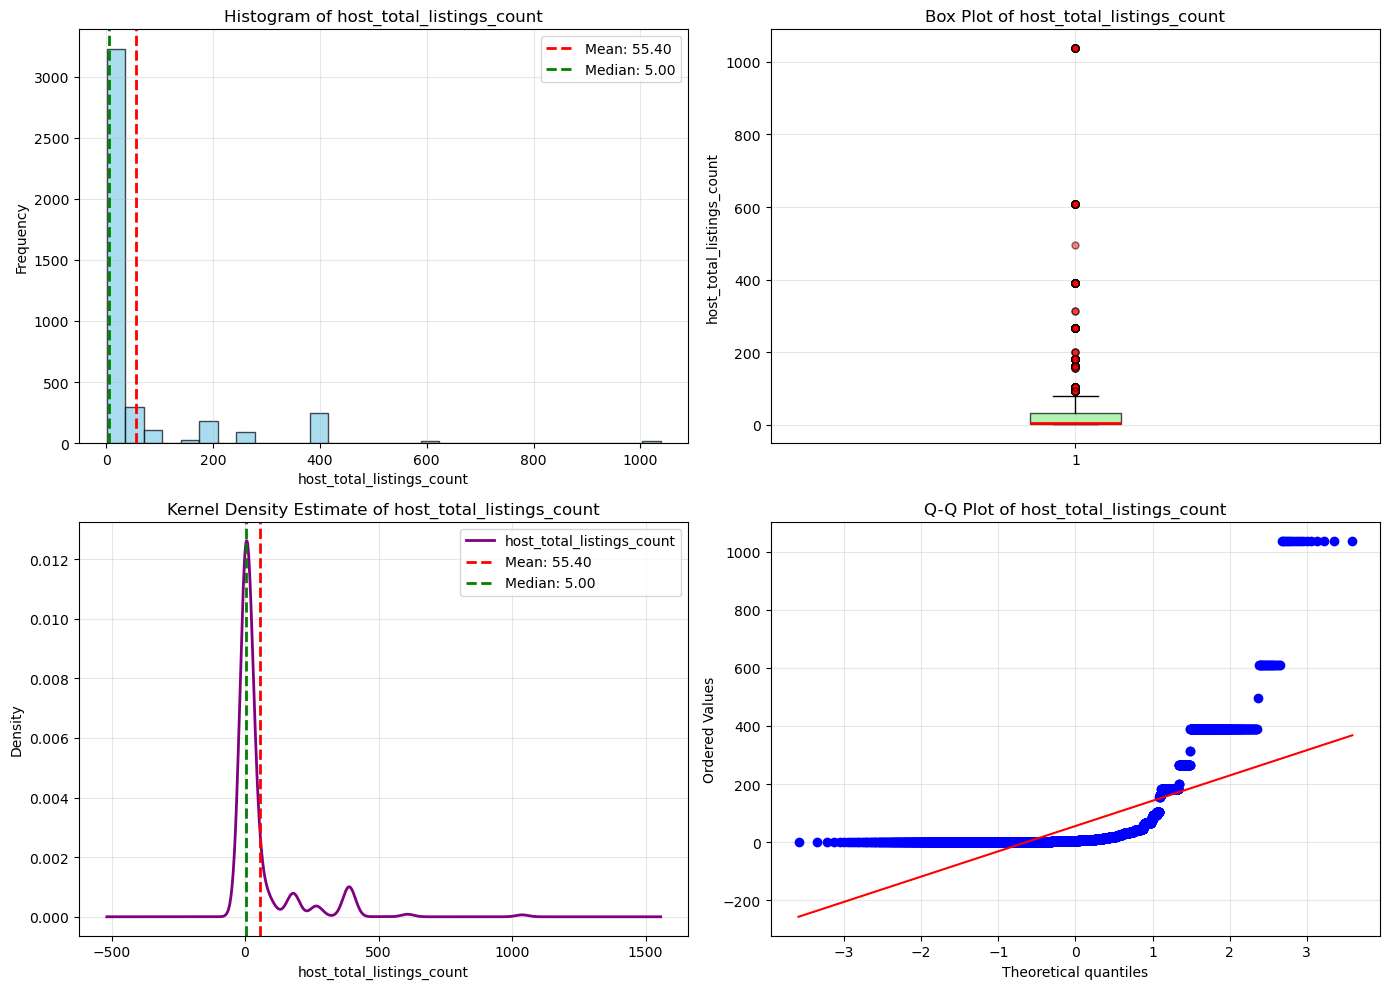

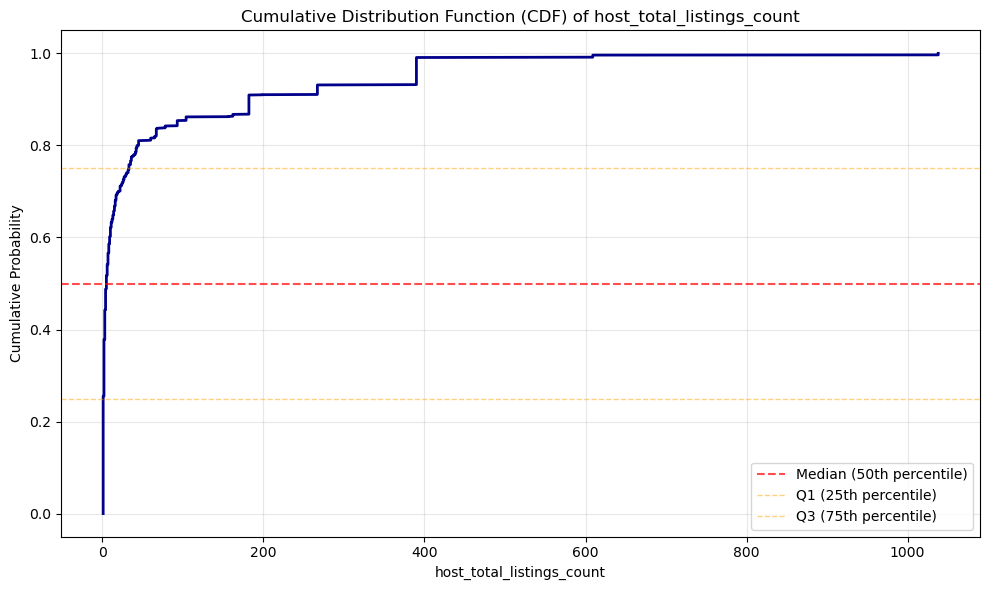

DESCRIPTIVE STATISTICS: estimated_occupancy_l365d

Central Tendency:
  Mean:           65.97
  Median:         36.00
  Mode:           0

Dispersion:
  Std Dev:        75.56
  Variance:       5709.96
  Range:          255.00
  IQR:            96.00

Quartiles:
  Min (0%):       0.00
  Q1 (25%):       6.00
  Q2 (50%):       36.00
  Q3 (75%):       102.00
  Max (100%):     255.00

Shape:
  Skewness:       1.217
  Kurtosis:       0.367

Sample Size:
  Valid:          4437
  Missing:        0
  Total:          4437


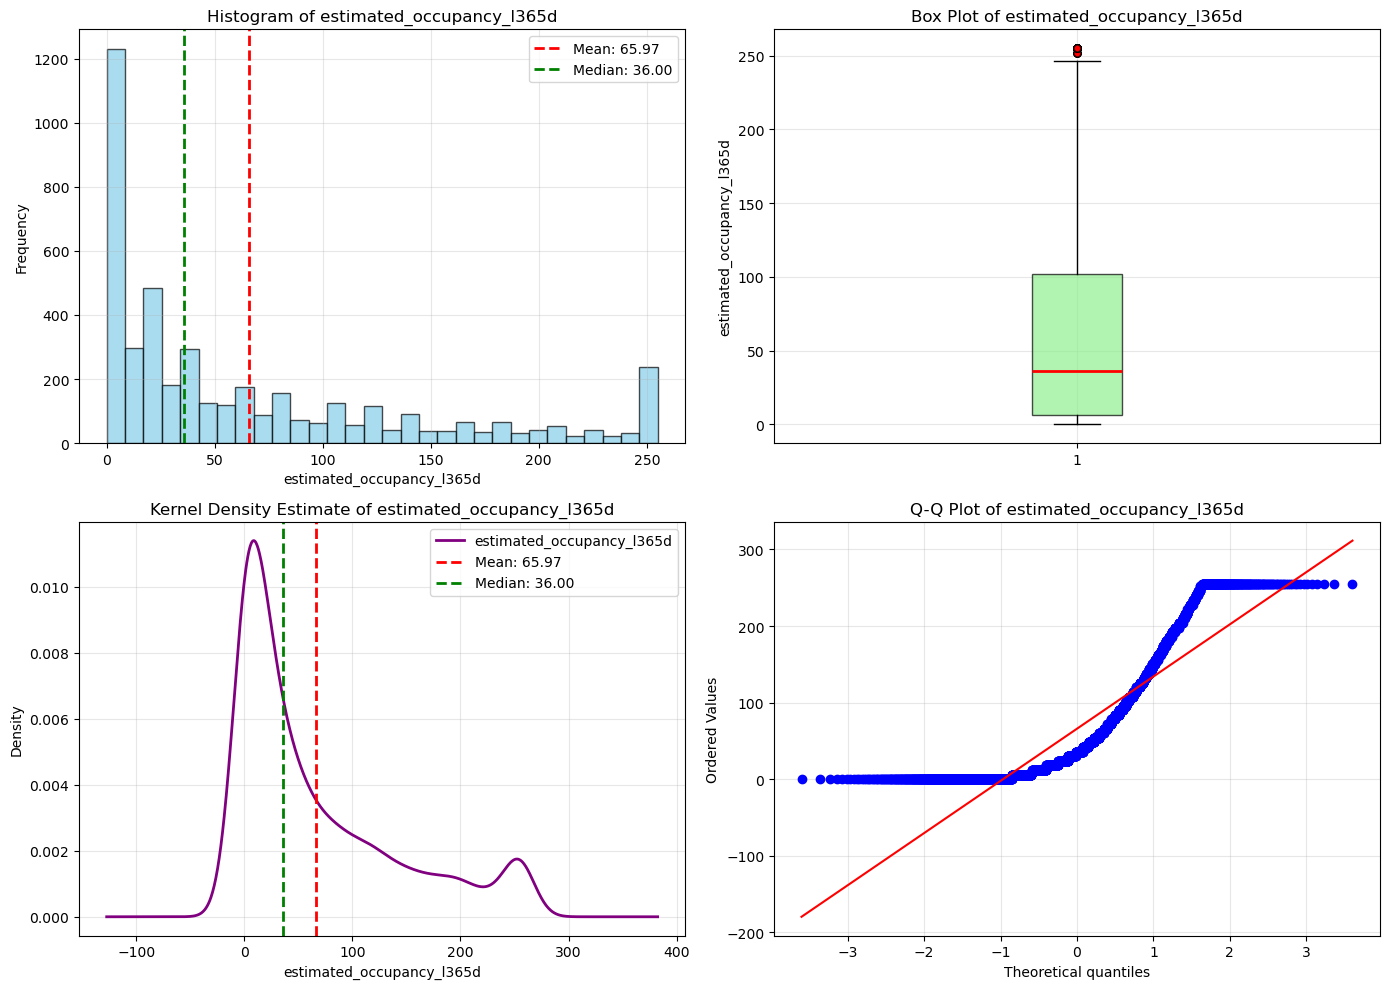

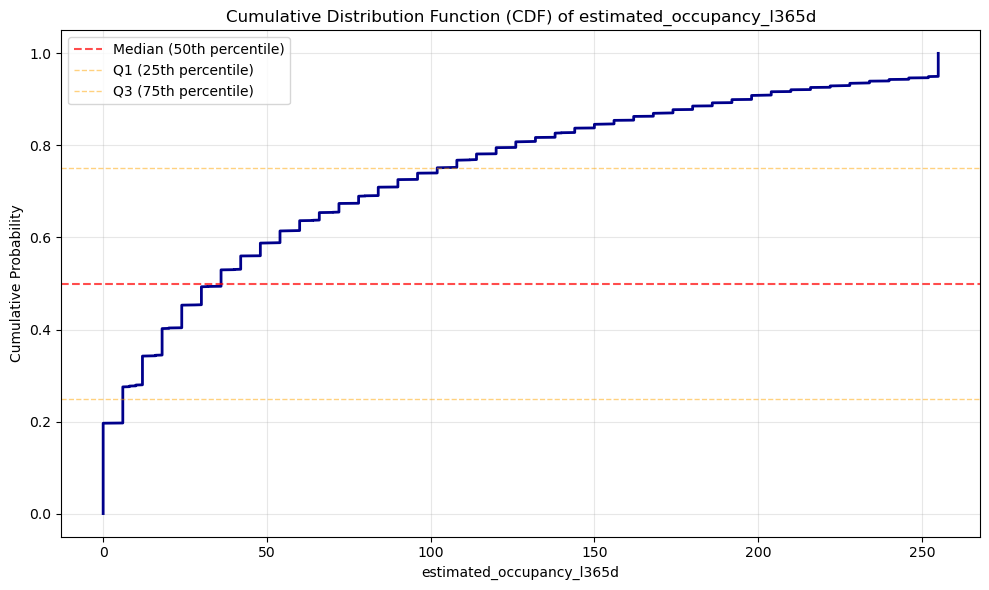

DESCRIPTIVE STATISTICS: estimated_revenue_l365d

Central Tendency:
  Mean:           4006.35
  Median:         1980.00
  Mode:           0.0

Dispersion:
  Std Dev:        5750.09
  Variance:       33063542.79
  Range:          109896.00
  IQR:            5244.00

Quartiles:
  Min (0%):       0.00
  Q1 (25%):       480.00
  Q2 (50%):       1980.00
  Q3 (75%):       5724.00
  Max (100%):     109896.00

Shape:
  Skewness:       5.163
  Kurtosis:       61.251

Sample Size:
  Valid:          4165
  Missing:        272
  Total:          4437


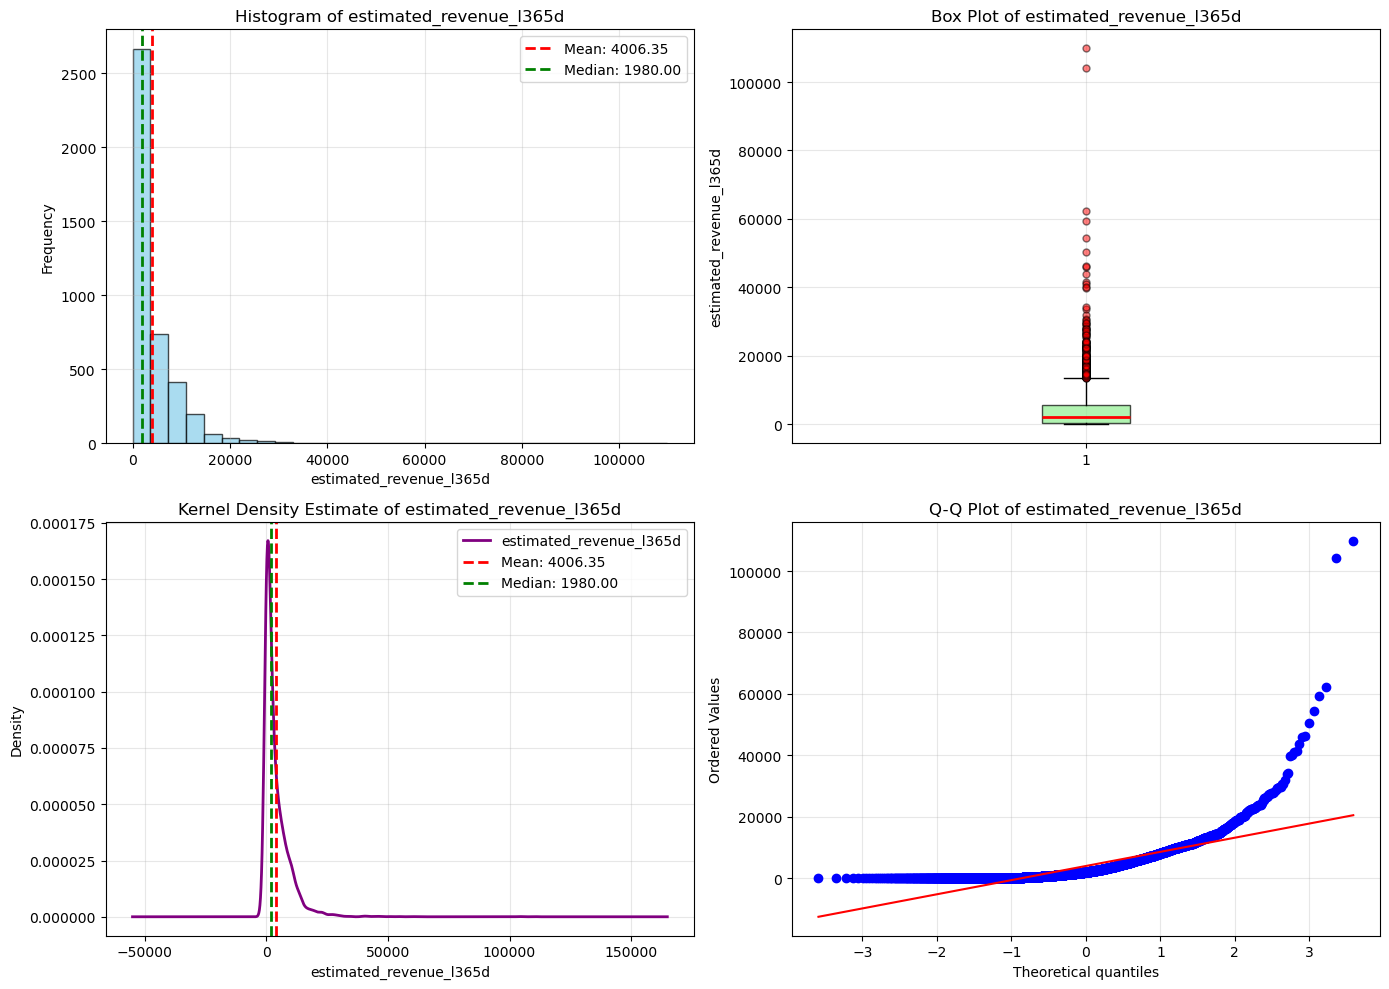

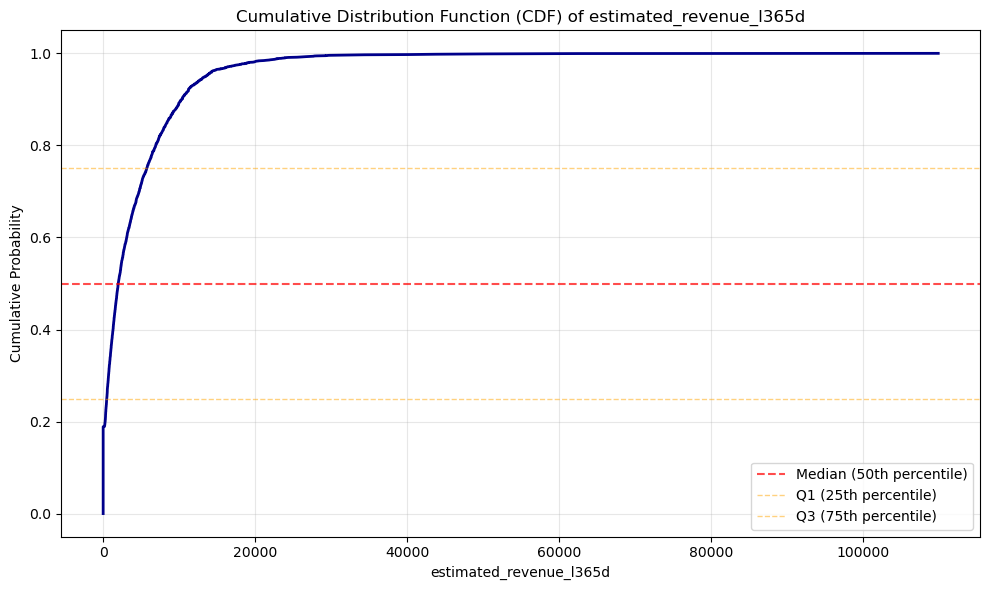

DESCRIPTIVE STATISTICS: number_of_reviews_ltm

Central Tendency:
  Mean:           11.49
  Median:         5.00
  Mode:           0

Dispersion:
  Std Dev:        15.22
  Variance:       231.61
  Range:          129.00
  IQR:            15.00

Quartiles:
  Min (0%):       0.00
  Q1 (25%):       1.00
  Q2 (50%):       5.00
  Q3 (75%):       16.00
  Max (100%):     129.00

Shape:
  Skewness:       2.322
  Kurtosis:       7.469

Sample Size:
  Valid:          4437
  Missing:        0
  Total:          4437


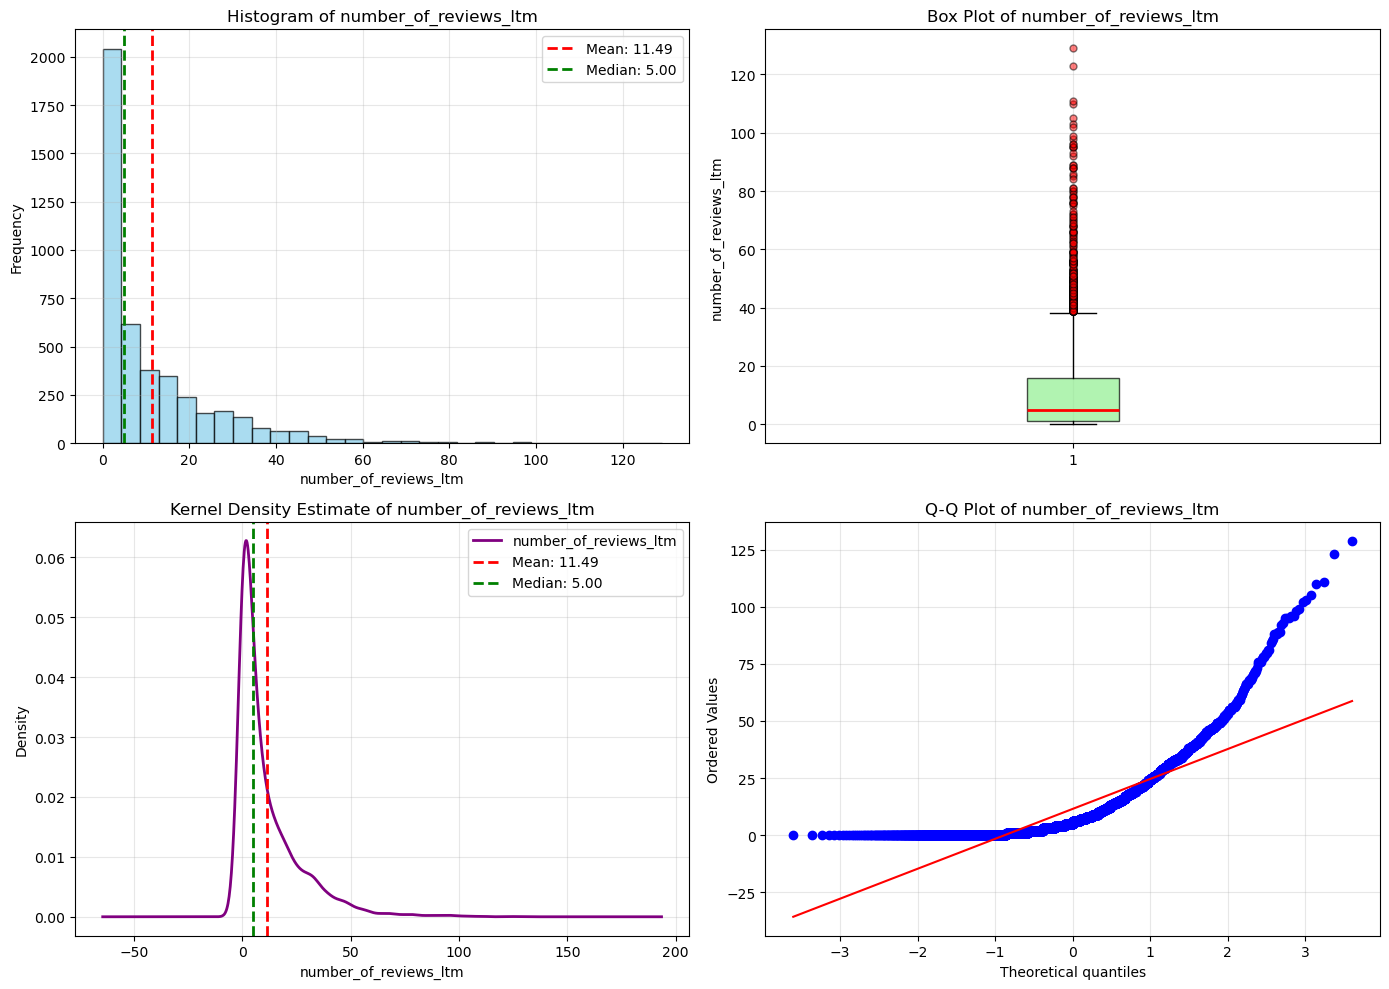

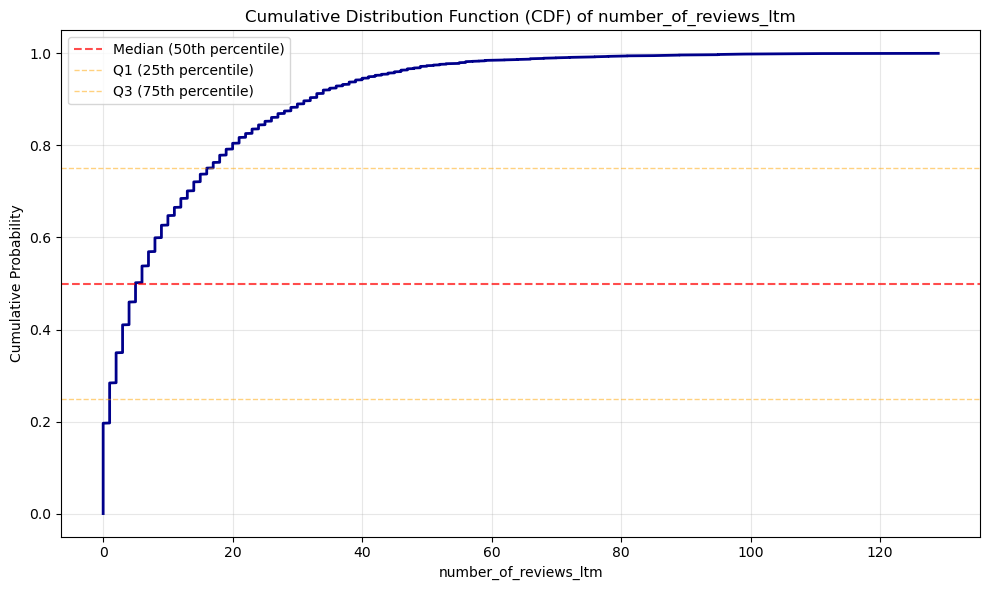

DESCRIPTIVE STATISTICS: availability_365

Central Tendency:
  Mean:           235.23
  Median:         263.00
  Mode:           0

Dispersion:
  Std Dev:        113.65
  Variance:       12916.21
  Range:          365.00
  IQR:            190.00

Quartiles:
  Min (0%):       0.00
  Q1 (25%):       151.00
  Q2 (50%):       263.00
  Q3 (75%):       341.00
  Max (100%):     365.00

Shape:
  Skewness:       -0.559
  Kurtosis:       -0.956

Sample Size:
  Valid:          4437
  Missing:        0
  Total:          4437


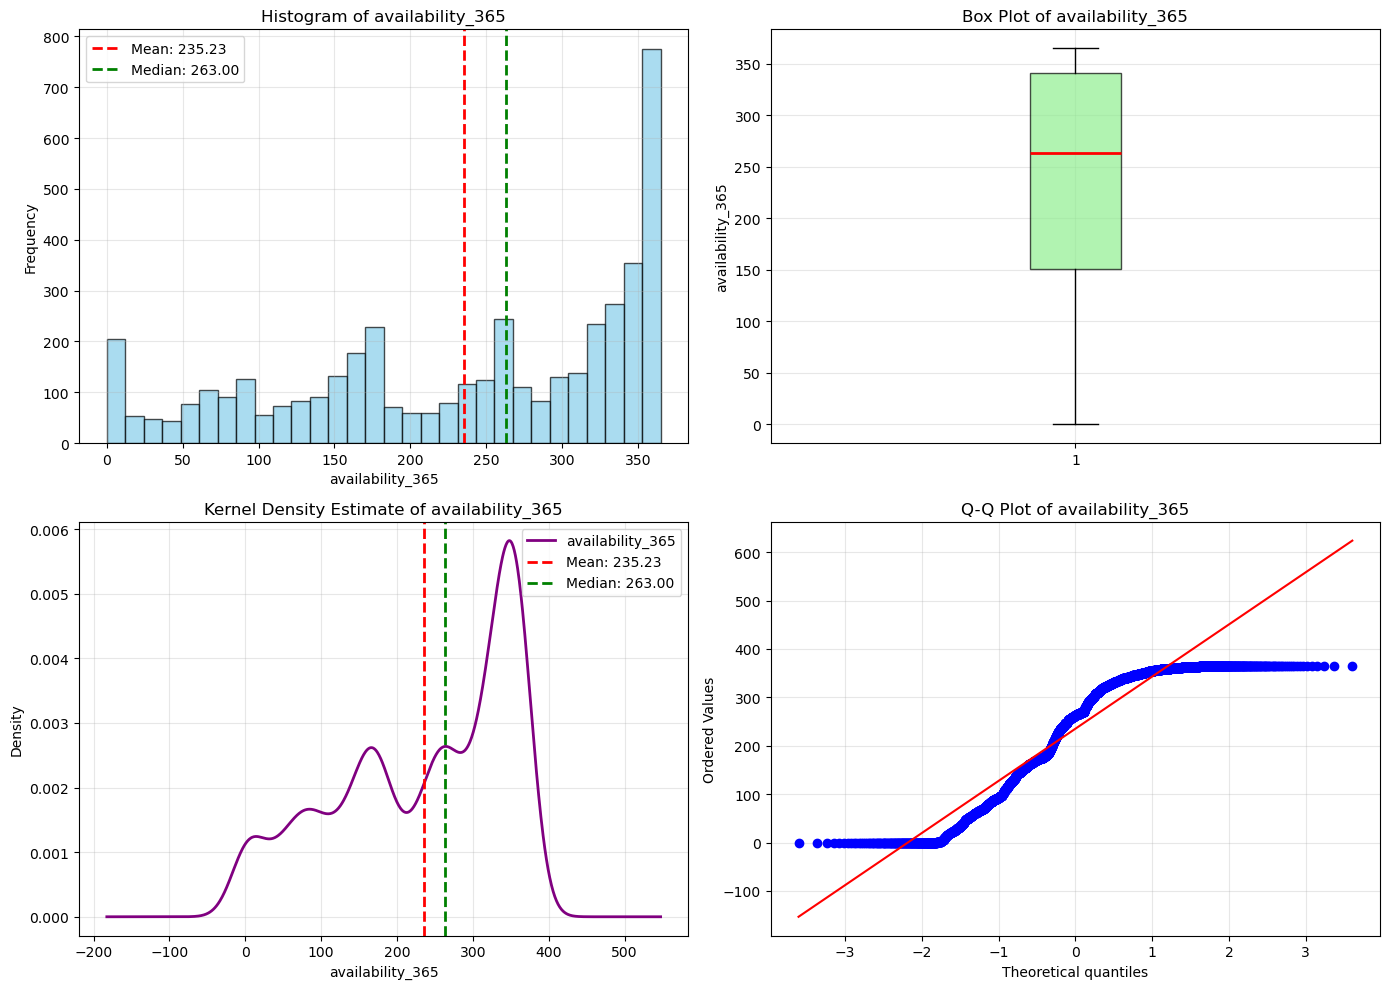

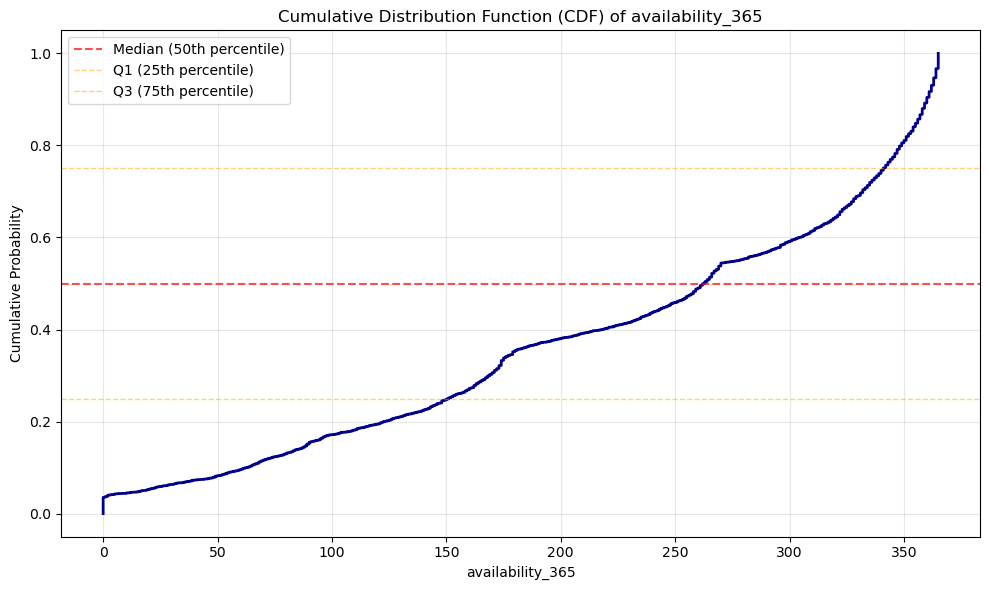

DESCRIPTIVE STATISTICS: review_scores_rating

Central Tendency:
  Mean:           4.73
  Median:         4.85
  Mode:           5.0

Dispersion:
  Std Dev:        0.40
  Variance:       0.16
  Range:          4.00
  IQR:            0.30

Quartiles:
  Min (0%):       1.00
  Q1 (25%):       4.67
  Q2 (50%):       4.85
  Q3 (75%):       4.97
  Max (100%):     5.00

Shape:
  Skewness:       -3.899
  Kurtosis:       23.763

Sample Size:
  Valid:          3941
  Missing:        496
  Total:          4437


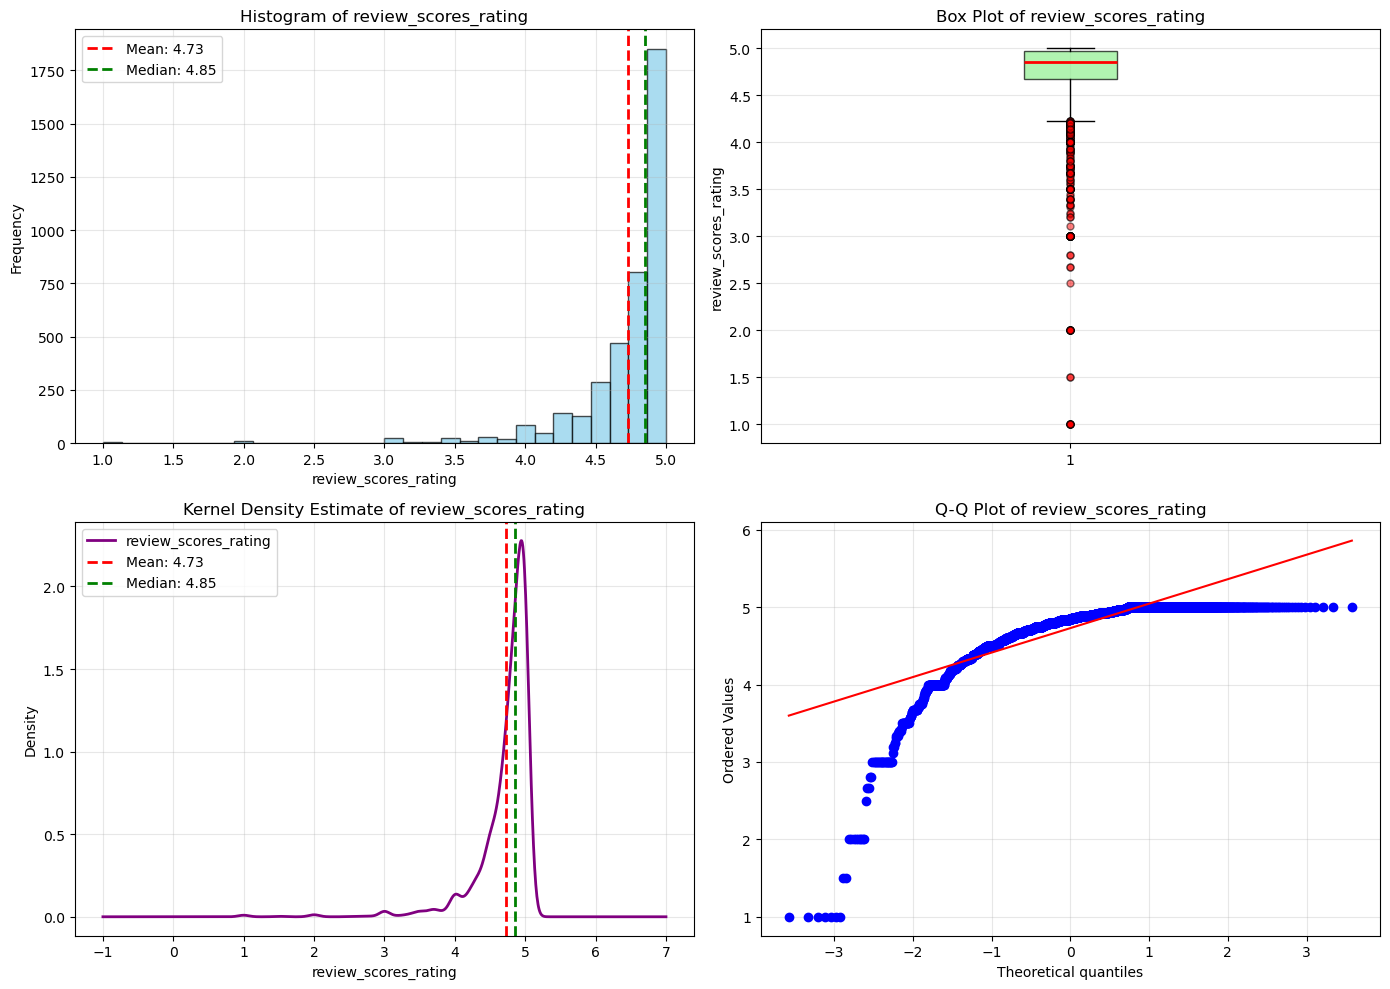

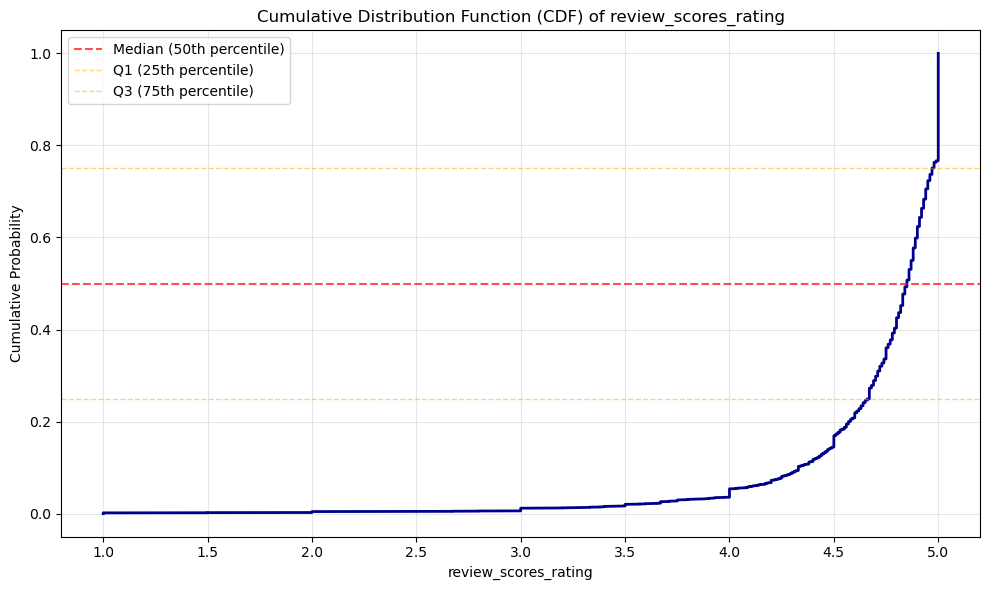

DESCRIPTIVE STATISTICS: review_scores_value

Central Tendency:
  Mean:           4.68
  Median:         4.78
  Mode:           5.0

Dispersion:
  Std Dev:        0.40
  Variance:       0.16
  Range:          4.00
  IQR:            0.32

Quartiles:
  Min (0%):       1.00
  Q1 (25%):       4.59
  Q2 (50%):       4.78
  Q3 (75%):       4.91
  Max (100%):     5.00

Shape:
  Skewness:       -3.833
  Kurtosis:       23.695

Sample Size:
  Valid:          3941
  Missing:        496
  Total:          4437


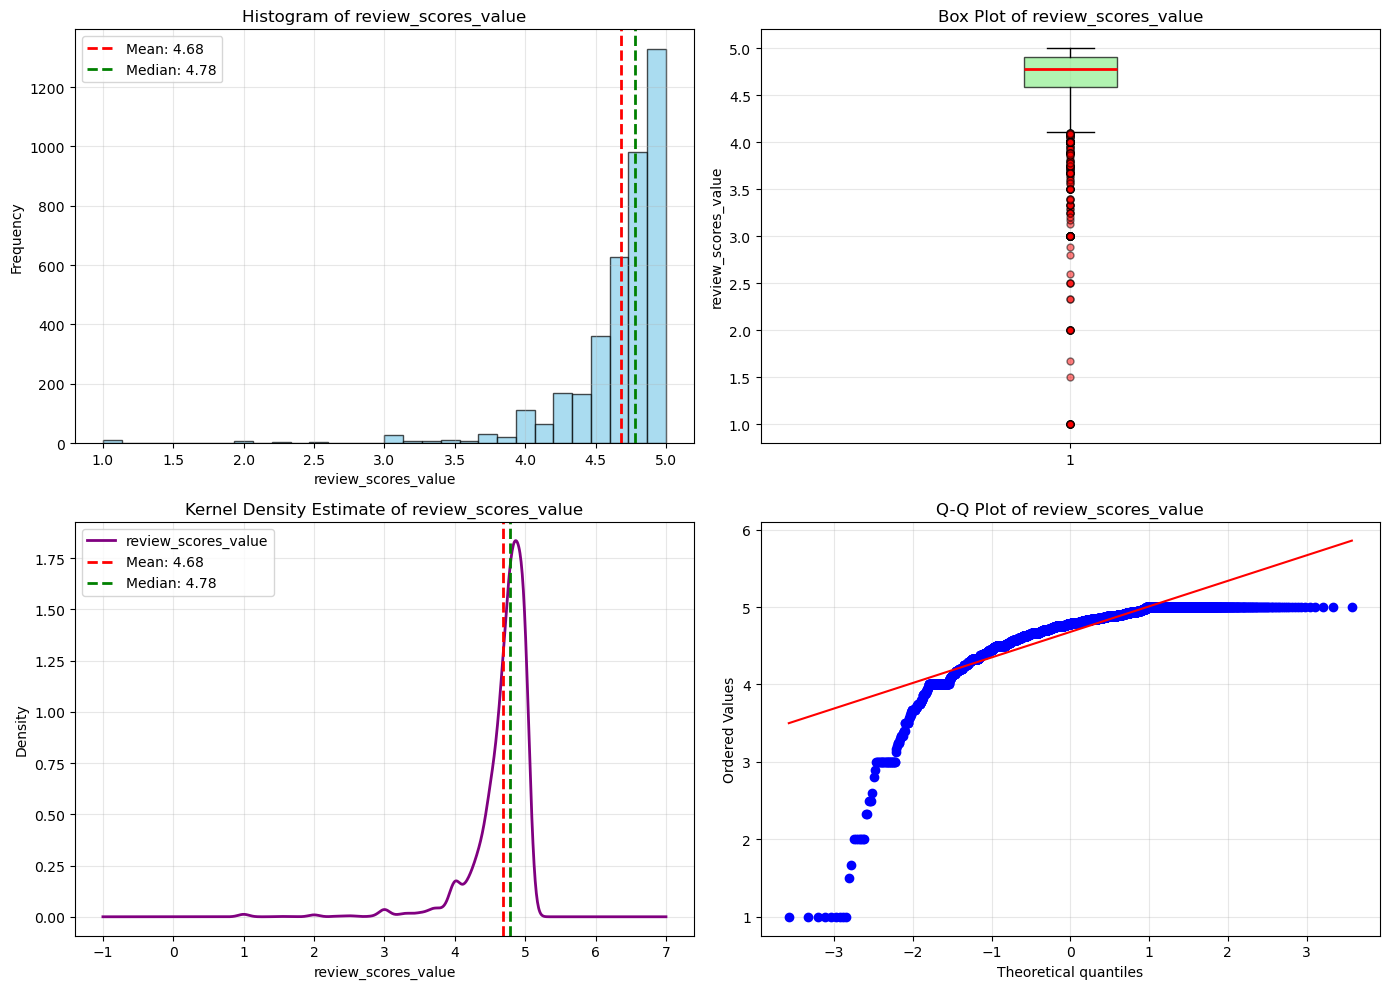

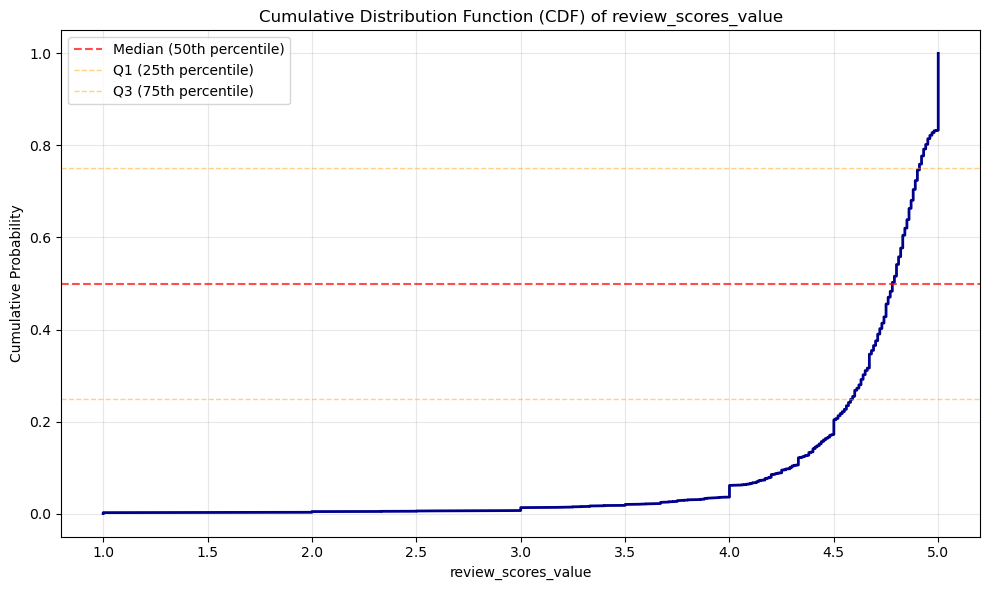

In [21]:
for col in h4_data.drop(columns=['id', 'host_id', 'instant_bookable', 'neighbourhood_cleansed']).columns:
    if h4_data[col].dtype != 'object':
        analyze_numeric_variable(h4_data[col])

Numeric - numeric scatter

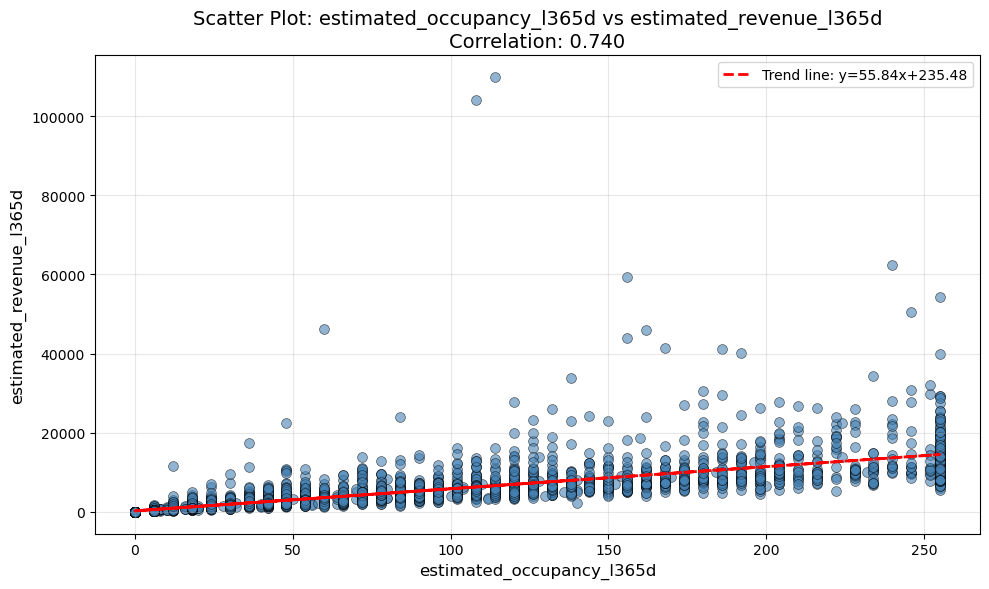

Pearson Correlation: 0.7399
Number of observations: 4165


In [51]:
plot_scatter(h4_data['estimated_occupancy_l365d'], h4_data['estimated_revenue_l365d'])

In [53]:
df.loc[df['estimated_revenue_l365d'] > 60000]

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category
2275,PROP_1387,Ho - Enti - En #0985,HOST_B14C,2015-03-18,"Thessaloniki, Greece",within an hour,100%,1.0,False,33,...,4.56,4.43,4.26,4.71,4.69,4.41,LIC_EAACCD,True,3.17,Large Multi (4+)
2551,PROP_2D05,Ma - Enti - En #1488,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,4.66,4.52,4.86,4.97,4.59,4.41,LIC_49A551,True,1.63,Large Multi (4+)
2552,PROP_084F,Ma - Enti - En #1489,HOST_569B,2019-07-29,"Thessaloniki, Greece",within an hour,97%,1.0,False,182,...,4.42,4.36,4.55,4.61,4.12,4.27,LIC_0B152F,True,1.86,Large Multi (4+)


# Create H4 summary document
h4_summary = """
H4: Market Sustainability Performance - NULL RESULT

Hypothesis: Higher availability → stronger engagement
Finding: No significant relationship (p > 0.05)
Implication: Market saturation - availability not a differentiator

Data Quality Issues Identified:
- Reviews_ly and reviews_ltm are duplicate metrics
- 300 listings (6.4%) missing price/bathrooms data
- Complete case analysis: N=4,400

Business Insight: Success driven by quality (H3 Superhost) and 
geographic positioning (H5), not availability strategy.
"""

H4: Market Sustainability Performance (NULL RESULT - DOCUMENTED)

Hypothesis Tested: Properties with higher availability demonstrate stronger engagement
Finding: No significant relationship found (all availability segments perform similarly)
Business Interpretation: Market saturation—availability strategy ineffective as differentiator
Statistical Evidence: ANOVA p > 0.05, negligible effect sizes across segments
Portfolio Value: Demonstrates appropriate null hypothesis documentation

<hr>

Analyzing categorical variable: Host_Category


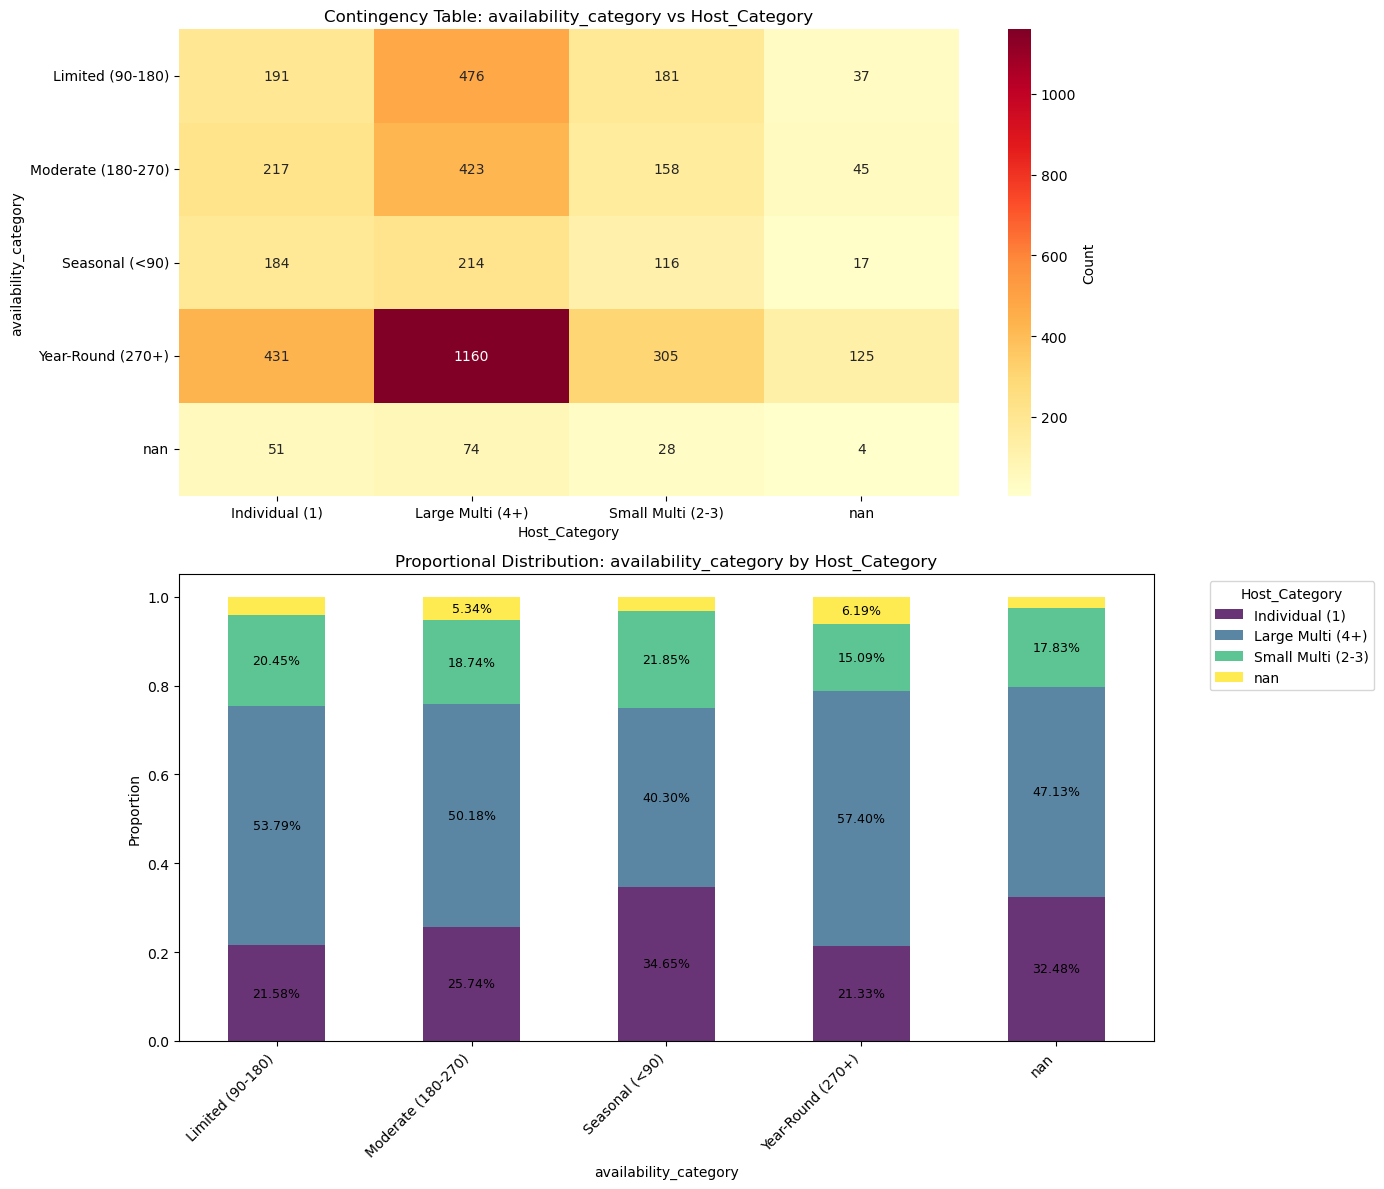

CHI-SQUARE TEST OF INDEPENDENCE: availability_category vs Host_Category

Contingency Table:
Host_Category          Individual (1)  Large Multi (4+)  Small Multi (2-3)  \
availability_category                                                        
Limited (90-180)                  191               476                181   
Moderate (180-270)                217               423                158   
Seasonal (<90)                    184               214                116   
Year-Round (270+)                 431              1160                305   
nan                                51                74                 28   

Host_Category          nan  
availability_category       
Limited (90-180)        37  
Moderate (180-270)      45  
Seasonal (<90)          17  
Year-Round (270+)      125  
nan                      4  

Test Statistics:
  Chi-square statistic: 93.6487
  Degrees of freedom:   12
  P-value:              0.000000
  Cramér's V:           0.084
  Effect size:    

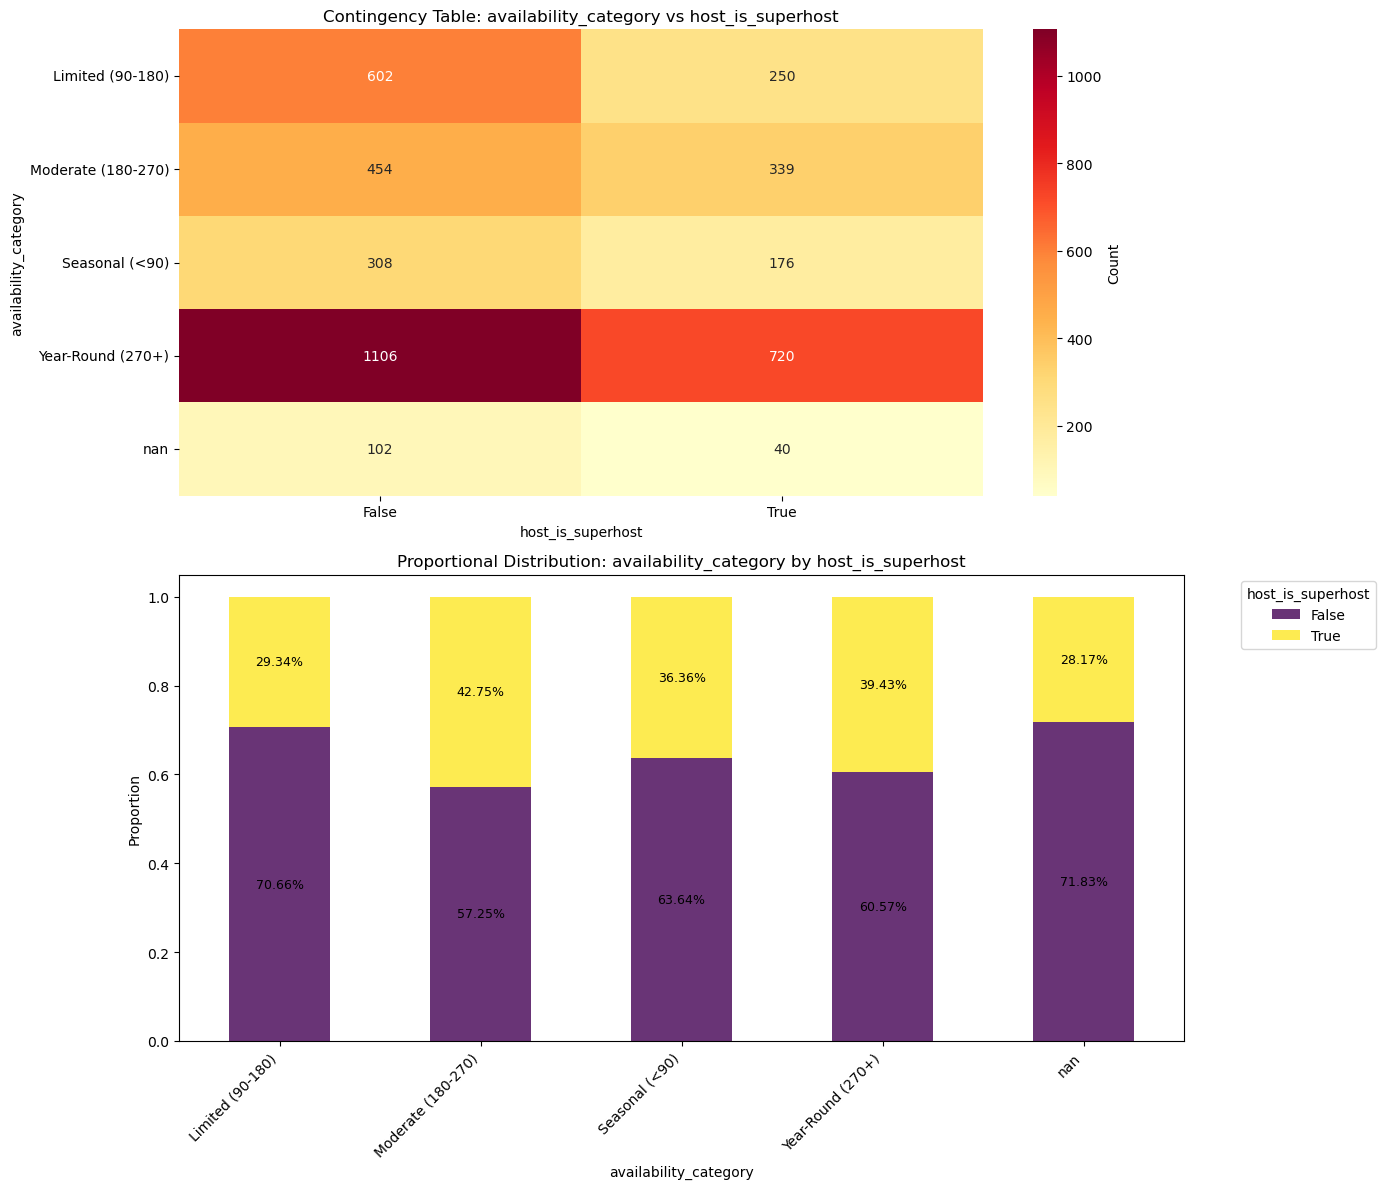

CHI-SQUARE TEST OF INDEPENDENCE: availability_category vs host_is_superhost

Contingency Table:
host_is_superhost      False  True 
availability_category              
Limited (90-180)         602    250
Moderate (180-270)       454    339
Seasonal (<90)           308    176
Year-Round (270+)       1106    720
nan                      102     40

Test Statistics:
  Chi-square statistic: 41.9474
  Degrees of freedom:   4
  P-value:              0.000000
  Cramér's V:           0.101
  Effect size:          Weak association
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT association detected (p=0.000000). availability_category and host_is_superhost are related. Weak association (Cramér's V = 0.101).





In [60]:
for col in h4_data.drop(columns=['id', 'host_id', 'availability_category']).columns:
    if h4_data[col].dtype == 'object':
        print(f"Analyzing categorical variable: {col}")
        analyze_categorical_categorical(h4_data['availability_category'], h4_data[col])
        print("\n\n")        
        print("=" * 100)

### Functions

/tmp/ipykernel_1889/922360585.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x=cat_name, y=num_name, ax=axes[1],


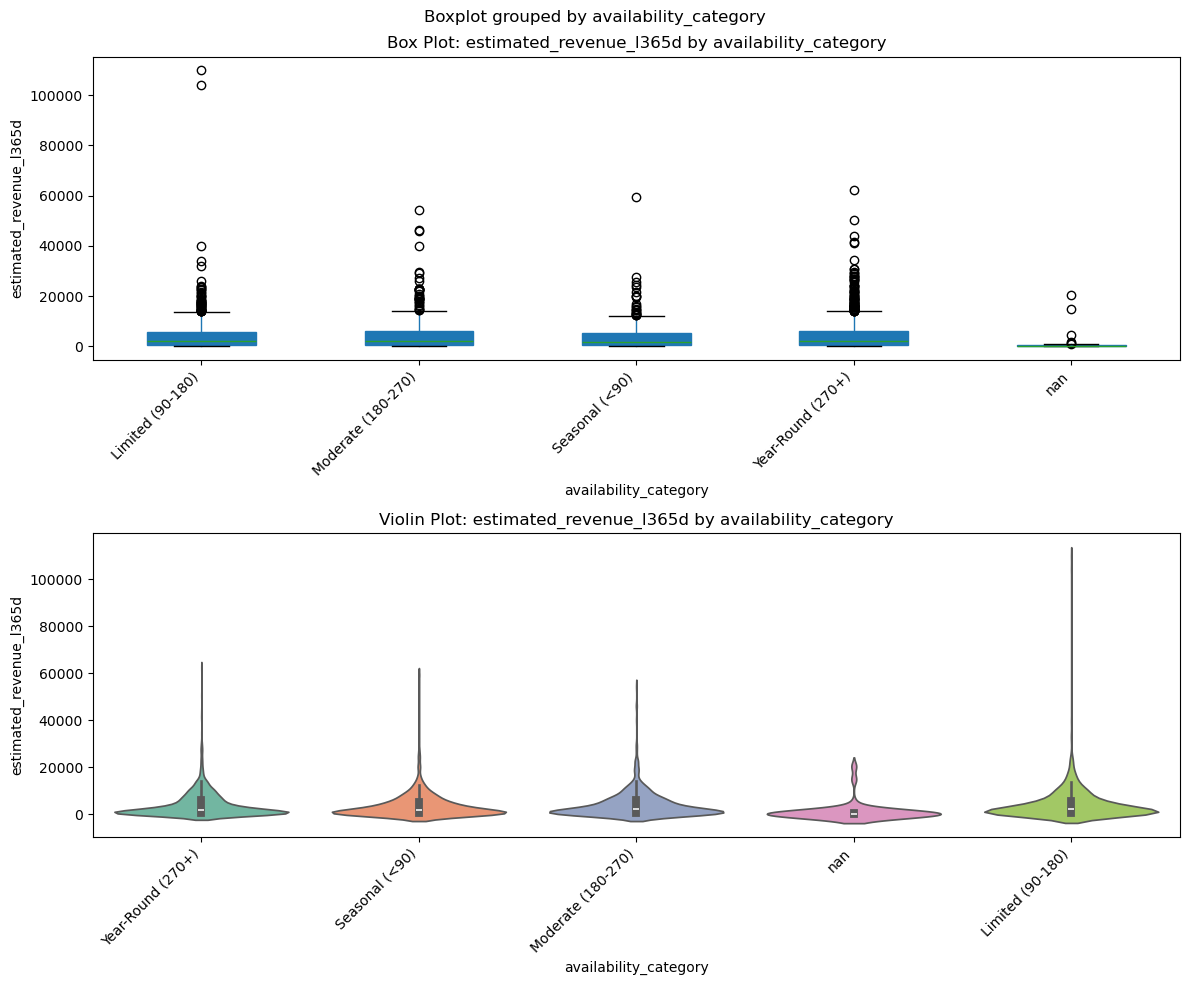

ONE-WAY ANOVA: estimated_revenue_l365d by availability_category

Descriptive Statistics by Group:

  availability_category = Year-Round (270+):
    N:      1953
    Mean:   4008.6979
    Median: 1944.0000
    Std:    5354.3750
    Min:    0.0000
    Max:    62400.0000

  availability_category = Seasonal (<90):
    N:      491
    Mean:   3520.1100
    Median: 1836.0000
    Std:    4987.5375
    Min:    0.0000
    Max:    59280.0000

  availability_category = Moderate (180-270):
    N:      827
    Mean:   4122.4172
    Median: 2178.0000
    Std:    5546.3055
    Min:    0.0000
    Max:    54315.0000

  availability_category = nan:
    N:      40
    Mean:   1180.9500
    Median: 0.0000
    Std:    3957.9426
    Min:    0.0000
    Max:    20400.0000

  availability_category = Limited (90-180):
    N:      854
    Mean:   4300.4707
    Median: 2217.0000
    Std:    7098.7562
    Min:    0.0000
    Max:    109896.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic

{'test_name': 'One-Way ANOVA',
 'test_statistic': np.float64(3.9462187018000345),
 'p_value': np.float64(0.003360515341868496),
 'effect_size': np.float64(0.0037800977014959135),
 'effect_measure': 'Eta-squared (η²)',
 'effect_interpretation': 'Negligible effect',
 'is_significant': np.True_,
 'n_groups': 5,
 'groups': array(['Year-Round (270+)', 'Seasonal (<90)', 'Moderate (180-270)',
        np.str_('nan'), 'Limited (90-180)'], dtype=object),
 'interpretation': 'SIGNIFICANT difference detected (p=0.003361). availability_category has a significant effect on estimated_revenue_l365d. Negligible effect (Eta-squared (η²) = 0.004).',
 'categorical_variable': 'availability_category',
 'numerical_variable': 'estimated_revenue_l365d'}

In [63]:
analyze_categorical_numerical(h4_data['availability_category'], h4_data['estimated_revenue_l365d'])

/tmp/ipykernel_1889/922360585.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined_df, x=cat_name, y=num_name, ax=axes[1],


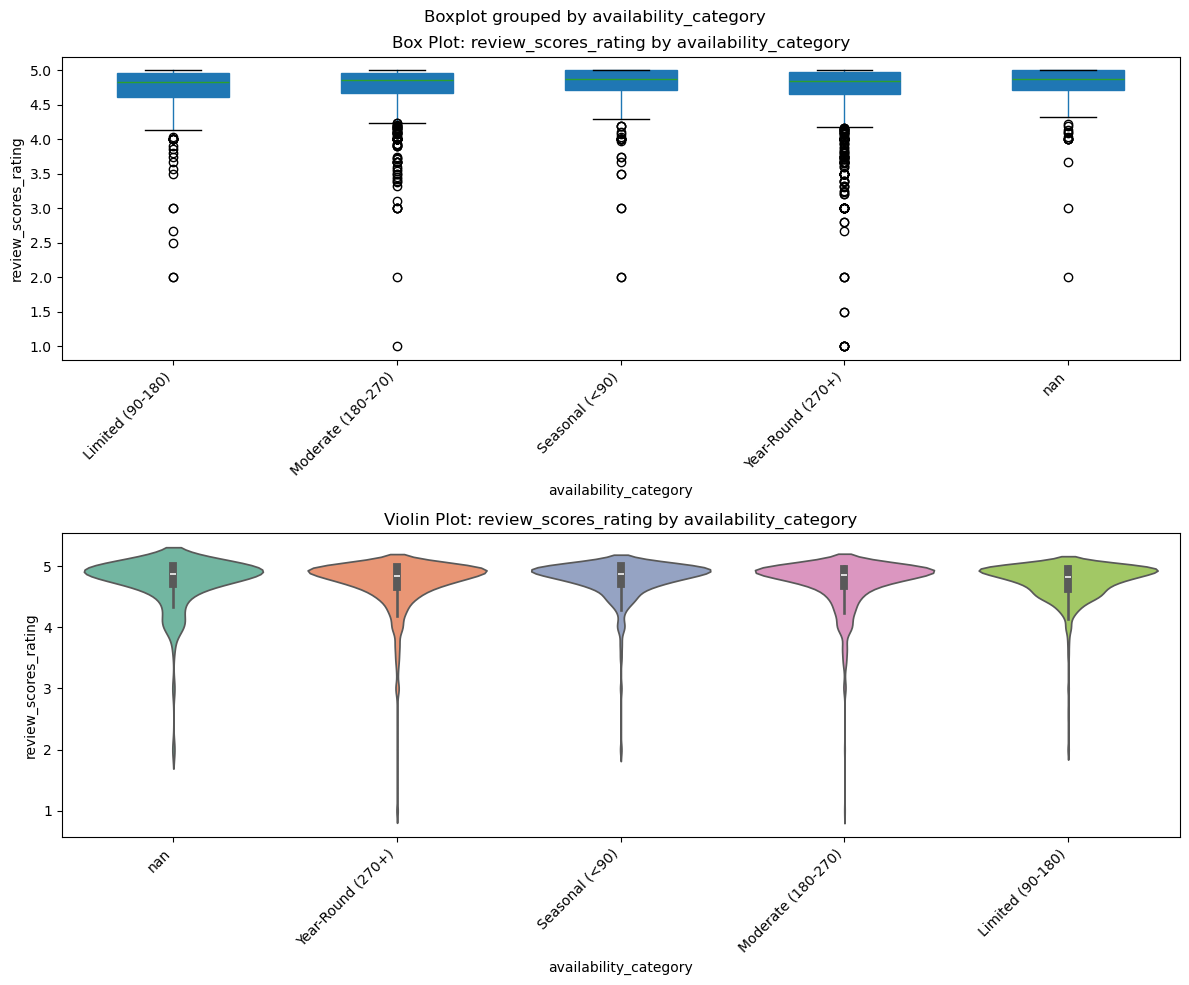

ONE-WAY ANOVA: review_scores_rating by availability_category

Descriptive Statistics by Group:

  availability_category = nan:
    N:      128
    Mean:   4.7468
    Median: 4.8800
    Std:    0.4110
    Min:    2.0000
    Max:    5.0000

  availability_category = Year-Round (270+):
    N:      1781
    Mean:   4.7089
    Median: 4.8400
    Std:    0.4447
    Min:    1.0000
    Max:    5.0000

  availability_category = Seasonal (<90):
    N:      484
    Mean:   4.7823
    Median: 4.8700
    Std:    0.3254
    Min:    2.0000
    Max:    5.0000

  availability_category = Moderate (180-270):
    N:      753
    Mean:   4.7239
    Median: 4.8600
    Std:    0.3860
    Min:    1.0000
    Max:    5.0000

  availability_category = Limited (90-180):
    N:      795
    Mean:   4.7468
    Median: 4.8300
    Std:    0.3130
    Min:    2.0000
    Max:    5.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      3.8538
  P-value:             0.003959
  Eta-squared (η²):

{'test_name': 'One-Way ANOVA',
 'test_statistic': np.float64(3.8537711722246533),
 'p_value': np.float64(0.003959022529188008),
 'effect_size': np.float64(0.003901155499615685),
 'effect_measure': 'Eta-squared (η²)',
 'effect_interpretation': 'Negligible effect',
 'is_significant': np.True_,
 'n_groups': 5,
 'groups': array([np.str_('nan'), 'Year-Round (270+)', 'Seasonal (<90)',
        'Moderate (180-270)', 'Limited (90-180)'], dtype=object),
 'interpretation': 'SIGNIFICANT difference detected (p=0.003959). availability_category has a significant effect on review_scores_rating. Negligible effect (Eta-squared (η²) = 0.004).',
 'categorical_variable': 'availability_category',
 'numerical_variable': 'review_scores_rating'}

In [64]:
analyze_categorical_numerical(h4_data['availability_category'], h4_data['review_scores_rating'])

BIVARIATE CORRELATION ANALYSIS: estimated_occupancy_l365d vs review_scores_rating

Sample Size:
  Valid observations: 3941
  Missing values:     496

Correlation Coefficients:
  Pearson's r:        0.1152
    P-value:          0.000000
    Significant:      YES (α=0.05)
  Spearman's ρ:       -0.0927
    P-value:          0.000000
    Significant:      YES (α=0.05)

Regression Statistics:
  R-squared (R²):     0.0133
  Slope:              0.0006
  Intercept:          4.6853
  Equation:           y = 0.0006x + 4.6853

Interpretation:
  Weak positive linear relationship between estimated_occupancy_l365d and review_scores_rating.
  1.33% of variance in review_scores_rating is explained by estimated_occupancy_l365d.


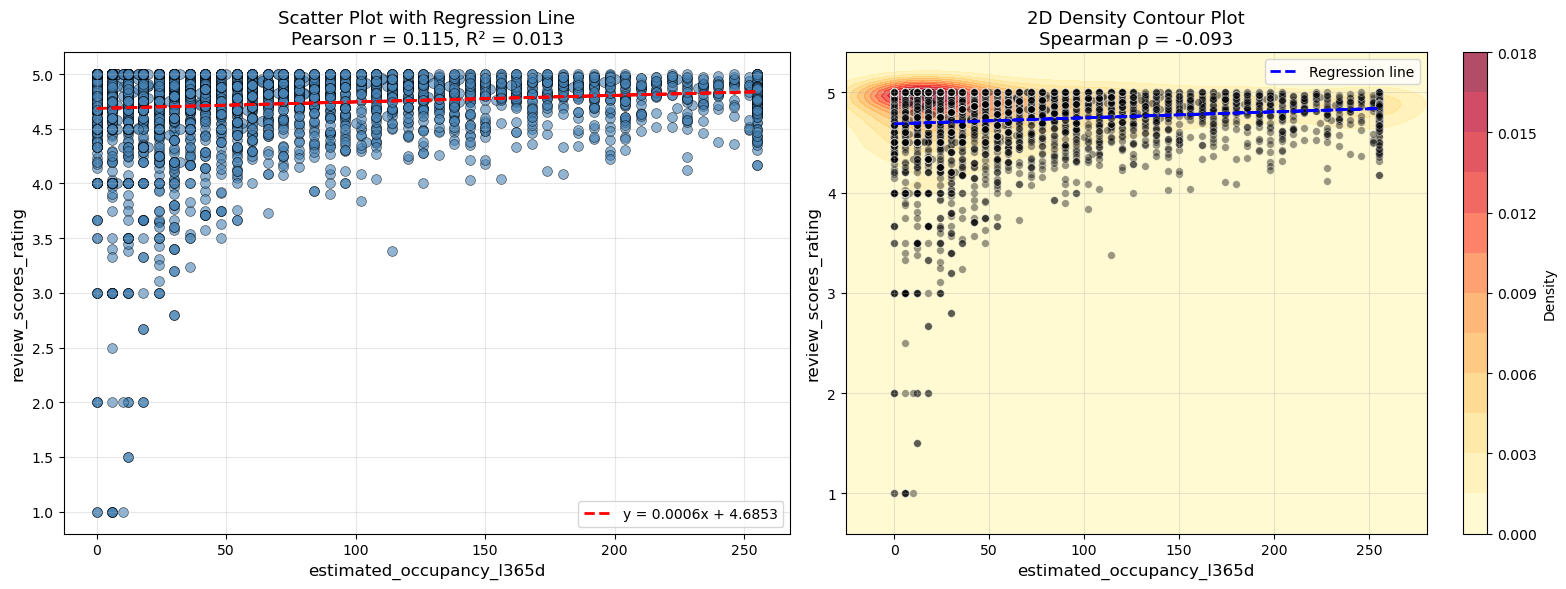

{'pearson_r': np.float64(0.11516296635447618),
 'pearson_p': np.float64(4.1226089352545e-13),
 'spearman_rho': np.float64(-0.09271023955435502),
 'spearman_p': np.float64(5.515527862390072e-09),
 'r_squared': 0.013262508819562369,
 'slope': np.float64(0.0005977118244226366),
 'intercept': np.float64(4.685257595940698),
 'n_observations': 3941,
 'strength': 'Weak',
 'direction': 'positive',
 'x_variable': 'estimated_occupancy_l365d',
 'y_variable': 'review_scores_rating'}

In [66]:
analyze_numerical_numerical(h4_data['estimated_occupancy_l365d'], h4_data['review_scores_rating'])